In [1]:
import CNN_lib
import CNN_utilities
import fig_lib 
import CNN_machine

import numpy as np
import pickle
import json

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# SETTINGS

In [2]:
trains_n=10

data_split='rnd_patients'                                # 'rnd_recs' 'rnd_patients'

checking_on=False
t_btw_frm=0.05
check_record_1= '670615_19'
check_record_2= 'ROT_670615_19'

In [3]:
number_data_ls = [i for i in range(48, 530, 32)]
#number_data_ls = [i for i in range(48, 530, 119)]
models_d = {'model'+'_'+str(n):{'path':None,'name':None,'samples':n} for n in number_data_ls}

epochs = 14

models_d

{'model_48': {'path': None, 'name': None, 'samples': 48},
 'model_80': {'path': None, 'name': None, 'samples': 80},
 'model_112': {'path': None, 'name': None, 'samples': 112},
 'model_144': {'path': None, 'name': None, 'samples': 144},
 'model_176': {'path': None, 'name': None, 'samples': 176},
 'model_208': {'path': None, 'name': None, 'samples': 208},
 'model_240': {'path': None, 'name': None, 'samples': 240},
 'model_272': {'path': None, 'name': None, 'samples': 272},
 'model_304': {'path': None, 'name': None, 'samples': 304},
 'model_336': {'path': None, 'name': None, 'samples': 336},
 'model_368': {'path': None, 'name': None, 'samples': 368},
 'model_400': {'path': None, 'name': None, 'samples': 400},
 'model_432': {'path': None, 'name': None, 'samples': 432},
 'model_464': {'path': None, 'name': None, 'samples': 464},
 'model_496': {'path': None, 'name': None, 'samples': 496},
 'model_528': {'path': None, 'name': None, 'samples': 528}}

### DATA SPLIT

In [4]:
if data_split == 'rnd_recs': test_size=0.2           

elif data_split == 'rnd_patients': patiens_split =[10,5]

### DATA AUGMENTATION

In [5]:
n_flip_1,n_flip_0=0.7 , 0.07

n_rot_1,n_rot_0=0.7 , 0.07

n_contr_1,n_contr_0=0.4 , 0.04

n_bright_1,n_bright_0=0.4 , 0.04

aug_params={'f1':n_flip_1,'f0':n_flip_0,'r1':n_rot_1,'r0':n_rot_0,'c1':n_contr_1,'c0':n_contr_0,'b1':n_bright_1,'b0':n_bright_0}

### PATHS

In [6]:
checkpoint_path = "C:/PROJECTS\emboendo\CNN\python-machine-learning\emboendo_ML\embo_CNN_lab\_static/checkpoints"
pkl_train_p='C:\PROJECTS\emboendo\CNN/pikles/processed_train_d.pkl'  

for n in number_data_ls:
    
    models_d['model'+'_'+str(n)]['path']=checkpoint_path+'_'+str(n)+'.h5'
    models_d['model'+'_'+str(n)]['name']='MODEL'+ ' ' + str(n)


check_points_p = [checkpoint_path+'_'+str(n)+'.h5' for n in range(trains_n)]

if data_split == 'rnd_patients': json_fix_sq_p='C:\PROJECTS\emboendo\dicom_viewer\_static\Jsons\points_fix_d.json'

# GENERATE TRAIN DATA

In [7]:
if data_split == 'rnd_patients':

    with open(json_fix_sq_p, 'r') as json_file:
        json_d = json.load(json_file)

    patients_d_df =  CNN_utilities.gen_patients_d_df(json_d)

In [8]:
with open(pkl_train_p, 'rb') as pikle_file:

    save_trains= pickle.load(pikle_file)

x_train,y_train,rcs =  save_trains[0],save_trains[1],save_trains[2]

max_frm_n, HEIGHT, WIDTH=np.shape(x_train)[1],np.shape(x_train)[2],np.shape(x_train)[3]
input_shape=(max_frm_n, HEIGHT, WIDTH, 1)

## MAIN DATA SHUFFLE

In [9]:
X_train,Y_train,recs=CNN_lib.shuffle(x_train,y_train,rcs)

# CNN

In [10]:
models=[CNN_machine.Gen_Model(aug_params,patients_d_df,name=values['name'],path=values['path'],input_shape=input_shape,samples=values['samples']) for values in models_d.values()]

In [11]:
for mdl in models:
    
    print(f'---------------------------------- ---------------------------------- ---------- ---------------------------------- ----------------------------------')
    print(f'---------------------------------- ---------------------------------- {mdl.name} ---------------------------------- ----------------------------------')
    print(f'---------------------------------- ---------------------------------- ---------- ---------------------------------- ----------------------------------')
    print(' ')

    mdl.train_model(X_train,Y_train,recs, epochs,trains_n,patiens_split)

    print(' ')
    print(' ')

---------------------------------- ---------------------------------- ---------- ---------------------------------- ----------------------------------
---------------------------------- ---------------------------------- MODEL 48 ---------------------------------- ----------------------------------
---------------------------------- ---------------------------------- ---------- ---------------------------------- ----------------------------------
 
Epoch 1/14
3/3 [==============================] - 4s 1s/step - loss: 0.7296 - accuracy: 0.4342 - val_loss: 0.6821 - val_accuracy: 0.7049
Epoch 2/14


c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 3s 1s/step - loss: 0.6745 - accuracy: 0.6579 - val_loss: 0.6699 - val_accuracy: 0.7049
Epoch 3/14
3/3 [==============================] - 3s 1s/step - loss: 0.6655 - accuracy: 0.6579 - val_loss: 0.6611 - val_accuracy: 0.7049
Epoch 4/14
3/3 [==============================] - 3s 1s/step - loss: 0.6610 - accuracy: 0.6579 - val_loss: 0.6648 - val_accuracy: 0.7049
Epoch 5/14
3/3 [==============================] - 3s 1s/step - loss: 0.6712 - accuracy: 0.6579 - val_loss: 0.6649 - val_accuracy: 0.7049
Epoch 6/14
3/3 [==============================] - 3s 1s/step - loss: 0.6631 - accuracy: 0.6579 - val_loss: 0.6613 - val_accuracy: 0.7049
Epoch 7/14
3/3 [==============================] - 3s 1s/step - loss: 0.6541 - accuracy: 0.6579 - val_loss: 0.6541 - val_accuracy: 0.7049
Epoch 8/14
3/3 [==============================] - 3s 1s/step - loss: 0.6597 - accuracy: 0.6579 - val_loss: 0.6462 - val_accuracy: 0.7049
Epoch 9/14
3/3 [==============================] - 3s

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 3s 1s/step - loss: 0.6864 - accuracy: 0.6628 - val_loss: 0.6109 - val_accuracy: 0.6105
Epoch 3/14
3/3 [==============================] - 3s 1s/step - loss: 0.6017 - accuracy: 0.6163 - val_loss: 0.6420 - val_accuracy: 0.6211
Epoch 4/14
3/3 [==============================] - 3s 1s/step - loss: 0.6243 - accuracy: 0.6860 - val_loss: 0.6375 - val_accuracy: 0.6737
Epoch 5/14
3/3 [==============================] - 3s 1s/step - loss: 0.6102 - accuracy: 0.7209 - val_loss: 0.6224 - val_accuracy: 0.7368
Epoch 6/14
3/3 [==============================] - 3s 1s/step - loss: 0.5830 - accuracy: 0.7093 - val_loss: 0.6066 - val_accuracy: 0.7368
Epoch 7/14
3/3 [==============================] - 3s 1s/step - loss: 0.5671 - accuracy: 0.6744 - val_loss: 0.6077 - val_accuracy: 0.7579
Epoch 8/14
3/3 [==============================] - 3s 1s/step - loss: 0.5306 - accuracy: 0.7442 - val_loss: 0.6130 - val_accuracy: 0.7474
Epoch 9/14
3/3 [==============================] - 3s

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 3s 985ms/step - loss: 0.5852 - accuracy: 0.6538 - val_loss: 0.5417 - val_accuracy: 0.7340
Epoch 4/14
3/3 [==============================] - 3s 985ms/step - loss: 0.5129 - accuracy: 0.7821 - val_loss: 0.5415 - val_accuracy: 0.7340
Epoch 5/14
3/3 [==============================] - 3s 984ms/step - loss: 0.5026 - accuracy: 0.7564 - val_loss: 0.5390 - val_accuracy: 0.7234
Epoch 6/14
3/3 [==============================] - 3s 988ms/step - loss: 0.5119 - accuracy: 0.7564 - val_loss: 0.5355 - val_accuracy: 0.7128
Epoch 7/14
3/3 [==============================] - 3s 988ms/step - loss: 0.4868 - accuracy: 0.7949 - val_loss: 0.5332 - val_accuracy: 0.6702
Epoch 8/14
3/3 [==============================] - 3s 979ms/step - loss: 0.4677 - accuracy: 0.8077 - val_loss: 0.5321 - val_accuracy: 0.6809
Epoch 9/14
3/3 [==============================] - 3s 970ms/step - loss: 0.4267 - accuracy: 0.8205 - val_loss: 0.5432 - val_accuracy: 0.6596
Epoch 10/14
3/3 [==============

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 4s 901ms/step - loss: 0.6940 - accuracy: 0.5379 - val_loss: 0.6892 - val_accuracy: 0.7719
Epoch 3/14
5/5 [==============================] - 4s 895ms/step - loss: 0.6955 - accuracy: 0.4924 - val_loss: 0.6887 - val_accuracy: 0.7895
Epoch 4/14
5/5 [==============================] - 4s 897ms/step - loss: 0.6861 - accuracy: 0.5530 - val_loss: 0.6808 - val_accuracy: 0.7895
Epoch 5/14
5/5 [==============================] - 5s 905ms/step - loss: 0.6877 - accuracy: 0.5985 - val_loss: 0.6720 - val_accuracy: 0.7895
Epoch 6/14
5/5 [==============================] - 4s 904ms/step - loss: 0.6874 - accuracy: 0.5682 - val_loss: 0.6699 - val_accuracy: 0.7895
Epoch 7/14
5/5 [==============================] - 5s 910ms/step - loss: 0.6809 - accuracy: 0.5606 - val_loss: 0.6662 - val_accuracy: 0.7895
Epoch 8/14
5/5 [==============================] - 5s 906ms/step - loss: 0.6858 - accuracy: 0.5758 - val_loss: 0.6733 - val_accuracy: 0.7895
Epoch 9/14
5/5 [===============

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 4s 890ms/step - loss: 0.5743 - accuracy: 0.6970 - val_loss: 0.6147 - val_accuracy: 0.7130
Epoch 3/14
5/5 [==============================] - 4s 893ms/step - loss: 0.5642 - accuracy: 0.7652 - val_loss: 0.6140 - val_accuracy: 0.7130
Epoch 4/14
5/5 [==============================] - 4s 889ms/step - loss: 0.5394 - accuracy: 0.7727 - val_loss: 0.6062 - val_accuracy: 0.6389
Epoch 5/14
5/5 [==============================] - 4s 893ms/step - loss: 0.5133 - accuracy: 0.7803 - val_loss: 0.6166 - val_accuracy: 0.6296
Epoch 6/14
5/5 [==============================] - 4s 886ms/step - loss: 0.5115 - accuracy: 0.7652 - val_loss: 0.6157 - val_accuracy: 0.6111
Epoch 7/14
5/5 [==============================] - 4s 887ms/step - loss: 0.5169 - accuracy: 0.7652 - val_loss: 0.6349 - val_accuracy: 0.6296
Epoch 8/14
5/5 [==============================] - 4s 884ms/step - loss: 0.4689 - accuracy: 0.8182 - val_loss: 0.6166 - val_accuracy: 0.6296
Epoch 9/14
5/5 [===============

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 5s 978ms/step - loss: 0.5754 - accuracy: 0.7162 - val_loss: 0.4937 - val_accuracy: 0.7419
Epoch 3/14
5/5 [==============================] - 5s 975ms/step - loss: 0.5087 - accuracy: 0.7500 - val_loss: 0.5084 - val_accuracy: 0.7204
Epoch 4/14
5/5 [==============================] - 5s 981ms/step - loss: 0.5027 - accuracy: 0.7568 - val_loss: 0.5355 - val_accuracy: 0.6989
Epoch 5/14
5/5 [==============================] - 5s 977ms/step - loss: 0.4473 - accuracy: 0.7838 - val_loss: 0.5407 - val_accuracy: 0.6882
Epoch 6/14
5/5 [==============================] - 5s 978ms/step - loss: 0.3694 - accuracy: 0.8243 - val_loss: 0.5684 - val_accuracy: 0.6989
Epoch 7/14
5/5 [==============================] - 5s 976ms/step - loss: 0.3694 - accuracy: 0.8243 - val_loss: 0.5706 - val_accuracy: 0.6882
Epoch 8/14
5/5 [==============================] - 5s 973ms/step - loss: 0.3689 - accuracy: 0.8649 - val_loss: 0.5715 - val_accuracy: 0.6344
Epoch 9/14
5/5 [===============

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7/7 [==============================] - 6s 868ms/step - loss: 0.6891 - accuracy: 0.5309 - val_loss: 0.6951 - val_accuracy: 0.3474
Epoch 3/14
7/7 [==============================] - 6s 864ms/step - loss: 0.6931 - accuracy: 0.5155 - val_loss: 0.6996 - val_accuracy: 0.3158
Epoch 4/14
7/7 [==============================] - 6s 873ms/step - loss: 0.6903 - accuracy: 0.5309 - val_loss: 0.6887 - val_accuracy: 0.7158
Epoch 5/14
7/7 [==============================] - 6s 872ms/step - loss: 0.6851 - accuracy: 0.5309 - val_loss: 0.6830 - val_accuracy: 0.7579
Epoch 6/14
7/7 [==============================] - 6s 866ms/step - loss: 0.6777 - accuracy: 0.5722 - val_loss: 0.6830 - val_accuracy: 0.7579
Epoch 7/14
7/7 [==============================] - 6s 873ms/step - loss: 0.6811 - accuracy: 0.5464 - val_loss: 0.6591 - val_accuracy: 0.7579
Epoch 8/14
7/7 [==============================] - 6s 862ms/step - loss: 0.6785 - accuracy: 0.6082 - val_loss: 0.6806 - val_accuracy: 0.7368
Epoch 9/14
7/7 [===============

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 6s 1s/step - loss: 0.6429 - accuracy: 0.6458 - val_loss: 0.6118 - val_accuracy: 0.7500
Epoch 9/14
6/6 [==============================] - 6s 1s/step - loss: 0.6547 - accuracy: 0.6250 - val_loss: 0.6089 - val_accuracy: 0.7177
Epoch 10/14
6/6 [==============================] - 6s 1s/step - loss: 0.6303 - accuracy: 0.6458 - val_loss: 0.6237 - val_accuracy: 0.6855
Epoch 11/14
6/6 [==============================] - 6s 1s/step - loss: 0.6213 - accuracy: 0.6406 - val_loss: 0.6188 - val_accuracy: 0.6774
Epoch 12/14
6/6 [==============================] - 6s 1s/step - loss: 0.6198 - accuracy: 0.7135 - val_loss: 0.6169 - val_accuracy: 0.6774
Epoch 13/14
6/6 [==============================] - 6s 1s/step - loss: 0.6133 - accuracy: 0.6927 - val_loss: 0.6314 - val_accuracy: 0.6452
Epoch 14/14
6/6 [==============================] - 6s 1s/step - loss: 0.5920 - accuracy: 0.7083 - val_loss: 0.6443 - val_accuracy: 0.6290
 
-------------- ITERATION 2/10 COMPLETED -----

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7/7 [==============================] - 6s 893ms/step - loss: 0.4620 - accuracy: 0.7778 - val_loss: 0.7452 - val_accuracy: 0.4381
Epoch 12/14
7/7 [==============================] - 6s 893ms/step - loss: 0.4860 - accuracy: 0.7828 - val_loss: 0.6543 - val_accuracy: 0.7143
Epoch 13/14
7/7 [==============================] - 6s 895ms/step - loss: 0.4339 - accuracy: 0.8131 - val_loss: 0.6696 - val_accuracy: 0.7238
Epoch 14/14
7/7 [==============================] - 6s 893ms/step - loss: 0.4496 - accuracy: 0.7879 - val_loss: 0.6720 - val_accuracy: 0.6476
 
-------------- ITERATION 3/10 COMPLETED --------------
 
4/4 [==============================] - 1s 165ms/step
Epoch 1/14
7/7 [==============================] - 6s 907ms/step - loss: 0.5965 - accuracy: 0.7268 - val_loss: 0.6648 - val_accuracy: 0.6780
Epoch 2/14
7/7 [==============================] - 6s 894ms/step - loss: 0.5143 - accuracy: 0.7423 - val_loss: 0.6924 - val_accuracy: 0.6441
Epoch 3/14
7/7 [==============================] - 6s 893

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 6s 1s/step - loss: 0.6262 - accuracy: 0.6720 - val_loss: 0.5768 - val_accuracy: 0.7107
Epoch 3/14
6/6 [==============================] - 6s 1s/step - loss: 0.5206 - accuracy: 0.7151 - val_loss: 0.5528 - val_accuracy: 0.7355
Epoch 4/14
6/6 [==============================] - 6s 1s/step - loss: 0.5180 - accuracy: 0.7473 - val_loss: 0.5470 - val_accuracy: 0.7603
Epoch 5/14
6/6 [==============================] - 6s 1s/step - loss: 0.4779 - accuracy: 0.7688 - val_loss: 0.5610 - val_accuracy: 0.6942
Epoch 6/14
6/6 [==============================] - 6s 1s/step - loss: 0.4294 - accuracy: 0.8011 - val_loss: 0.5843 - val_accuracy: 0.7025
Epoch 7/14
6/6 [==============================] - 6s 1s/step - loss: 0.4031 - accuracy: 0.8065 - val_loss: 0.5869 - val_accuracy: 0.7107
Epoch 8/14
6/6 [==============================] - 6s 1s/step - loss: 0.3921 - accuracy: 0.8226 - val_loss: 0.5781 - val_accuracy: 0.6860
Epoch 9/14
6/6 [==============================] - 6s

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7/7 [==============================] - 6s 885ms/step - loss: 0.5348 - accuracy: 0.7551 - val_loss: 0.5874 - val_accuracy: 0.7453
Epoch 3/14
7/7 [==============================] - 6s 886ms/step - loss: 0.4898 - accuracy: 0.8061 - val_loss: 0.6122 - val_accuracy: 0.6792
Epoch 4/14
7/7 [==============================] - 6s 887ms/step - loss: 0.4795 - accuracy: 0.7908 - val_loss: 0.6221 - val_accuracy: 0.6509
Epoch 5/14
7/7 [==============================] - 6s 890ms/step - loss: 0.4590 - accuracy: 0.8265 - val_loss: 0.6525 - val_accuracy: 0.6226
Epoch 6/14
7/7 [==============================] - 6s 889ms/step - loss: 0.4520 - accuracy: 0.8316 - val_loss: 0.6467 - val_accuracy: 0.6604
Epoch 7/14
7/7 [==============================] - 6s 890ms/step - loss: 0.4264 - accuracy: 0.8520 - val_loss: 0.6145 - val_accuracy: 0.6981
Epoch 8/14
7/7 [==============================] - 6s 889ms/step - loss: 0.3991 - accuracy: 0.8265 - val_loss: 0.5741 - val_accuracy: 0.7075
Epoch 9/14
7/7 [===============

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 6s 1s/step - loss: 0.5030 - accuracy: 0.7473 - val_loss: 0.5382 - val_accuracy: 0.6842
Epoch 3/14
6/6 [==============================] - 6s 1s/step - loss: 0.4515 - accuracy: 0.7742 - val_loss: 0.5740 - val_accuracy: 0.6754
Epoch 4/14
6/6 [==============================] - 6s 1s/step - loss: 0.4389 - accuracy: 0.7957 - val_loss: 0.5271 - val_accuracy: 0.7105
Epoch 5/14
6/6 [==============================] - 6s 1s/step - loss: 0.4321 - accuracy: 0.7849 - val_loss: 0.5640 - val_accuracy: 0.7018
Epoch 6/14
6/6 [==============================] - 6s 1s/step - loss: 0.3879 - accuracy: 0.8172 - val_loss: 0.5686 - val_accuracy: 0.7018
Epoch 7/14
6/6 [==============================] - 6s 1s/step - loss: 0.3531 - accuracy: 0.8387 - val_loss: 0.5825 - val_accuracy: 0.6930
Epoch 8/14
6/6 [==============================] - 6s 1s/step - loss: 0.3341 - accuracy: 0.8333 - val_loss: 0.5390 - val_accuracy: 0.7193
Epoch 9/14
6/6 [==============================] - 6s

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 7s 927ms/step - loss: 0.7024 - accuracy: 0.5294 - val_loss: 0.6848 - val_accuracy: 0.6907
Epoch 3/14
8/8 [==============================] - 7s 926ms/step - loss: 0.6815 - accuracy: 0.5882 - val_loss: 0.6779 - val_accuracy: 0.6907
Epoch 4/14
8/8 [==============================] - 7s 925ms/step - loss: 0.6839 - accuracy: 0.5756 - val_loss: 0.6696 - val_accuracy: 0.6907
Epoch 5/14
8/8 [==============================] - 7s 917ms/step - loss: 0.6785 - accuracy: 0.5714 - val_loss: 0.6732 - val_accuracy: 0.6907
Epoch 6/14
8/8 [==============================] - 7s 928ms/step - loss: 0.6611 - accuracy: 0.6261 - val_loss: 0.6613 - val_accuracy: 0.6598
Epoch 7/14
8/8 [==============================] - 7s 916ms/step - loss: 0.6299 - accuracy: 0.6387 - val_loss: 0.7015 - val_accuracy: 0.5258
Epoch 8/14
8/8 [==============================] - 7s 923ms/step - loss: 0.6271 - accuracy: 0.6597 - val_loss: 0.6527 - val_accuracy: 0.5876
Epoch 9/14
8/8 [===============

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 8s 980ms/step - loss: 0.5377 - accuracy: 0.7480 - val_loss: 0.5676 - val_accuracy: 0.7339
Epoch 3/14
8/8 [==============================] - 8s 984ms/step - loss: 0.5439 - accuracy: 0.6992 - val_loss: 0.5818 - val_accuracy: 0.6694
Epoch 4/14
8/8 [==============================] - 8s 977ms/step - loss: 0.4885 - accuracy: 0.7683 - val_loss: 0.5762 - val_accuracy: 0.6935
Epoch 5/14
8/8 [==============================] - 8s 979ms/step - loss: 0.4469 - accuracy: 0.7846 - val_loss: 0.5674 - val_accuracy: 0.6935
Epoch 6/14
8/8 [==============================] - 8s 981ms/step - loss: 0.4285 - accuracy: 0.7967 - val_loss: 0.5931 - val_accuracy: 0.6694
Epoch 7/14
8/8 [==============================] - 8s 981ms/step - loss: 0.3921 - accuracy: 0.7967 - val_loss: 0.5831 - val_accuracy: 0.7016
Epoch 8/14
8/8 [==============================] - 8s 982ms/step - loss: 0.4202 - accuracy: 0.7805 - val_loss: 0.6508 - val_accuracy: 0.6935
Epoch 9/14
8/8 [===============

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 8s 974ms/step - loss: 0.5036 - accuracy: 0.7661 - val_loss: 0.4661 - val_accuracy: 0.8000
Epoch 3/14
8/8 [==============================] - 8s 972ms/step - loss: 0.4572 - accuracy: 0.7903 - val_loss: 0.4841 - val_accuracy: 0.7545
Epoch 4/14
8/8 [==============================] - 8s 976ms/step - loss: 0.4335 - accuracy: 0.7984 - val_loss: 0.4825 - val_accuracy: 0.7636
Epoch 5/14
8/8 [==============================] - 8s 970ms/step - loss: 0.4000 - accuracy: 0.8105 - val_loss: 0.4839 - val_accuracy: 0.7818
Epoch 6/14
8/8 [==============================] - 8s 975ms/step - loss: 0.3760 - accuracy: 0.8508 - val_loss: 0.4707 - val_accuracy: 0.7727
Epoch 7/14
8/8 [==============================] - 8s 966ms/step - loss: 0.3508 - accuracy: 0.8508 - val_loss: 0.4690 - val_accuracy: 0.7818
Epoch 8/14
8/8 [==============================] - 8s 973ms/step - loss: 0.2964 - accuracy: 0.8790 - val_loss: 0.4948 - val_accuracy: 0.7636
Epoch 9/14
8/8 [===============

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 8s 959ms/step - loss: 0.3936 - accuracy: 0.8529 - val_loss: 0.4537 - val_accuracy: 0.8676
Epoch 5/14
8/8 [==============================] - 8s 955ms/step - loss: 0.3388 - accuracy: 0.8487 - val_loss: 0.5026 - val_accuracy: 0.8309
Epoch 6/14
8/8 [==============================] - 8s 957ms/step - loss: 0.3013 - accuracy: 0.8782 - val_loss: 0.5050 - val_accuracy: 0.8162
Epoch 7/14
8/8 [==============================] - 8s 958ms/step - loss: 0.2624 - accuracy: 0.9160 - val_loss: 0.5389 - val_accuracy: 0.8088
Epoch 8/14
8/8 [==============================] - 8s 957ms/step - loss: 0.2685 - accuracy: 0.8866 - val_loss: 0.6157 - val_accuracy: 0.7868
Epoch 9/14
8/8 [==============================] - 8s 958ms/step - loss: 0.2217 - accuracy: 0.9118 - val_loss: 0.6026 - val_accuracy: 0.7721
Epoch 10/14
8/8 [==============================] - 8s 963ms/step - loss: 0.2410 - accuracy: 0.9118 - val_loss: 0.6410 - val_accuracy: 0.7794
Epoch 11/14
8/8 [=============

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 8s 981ms/step - loss: 0.4841 - accuracy: 0.7800 - val_loss: 0.4723 - val_accuracy: 0.8273
Epoch 3/14
8/8 [==============================] - 8s 987ms/step - loss: 0.4358 - accuracy: 0.8240 - val_loss: 0.4611 - val_accuracy: 0.8545
Epoch 4/14
8/8 [==============================] - 8s 979ms/step - loss: 0.3566 - accuracy: 0.8400 - val_loss: 0.4619 - val_accuracy: 0.8000
Epoch 5/14
8/8 [==============================] - 8s 982ms/step - loss: 0.3180 - accuracy: 0.8640 - val_loss: 0.4892 - val_accuracy: 0.8364
Epoch 6/14
8/8 [==============================] - 8s 983ms/step - loss: 0.3013 - accuracy: 0.8720 - val_loss: 0.5575 - val_accuracy: 0.7909
Epoch 7/14
8/8 [==============================] - 8s 983ms/step - loss: 0.2623 - accuracy: 0.8880 - val_loss: 0.5049 - val_accuracy: 0.8182
Epoch 8/14
8/8 [==============================] - 8s 984ms/step - loss: 0.2429 - accuracy: 0.9040 - val_loss: 0.5315 - val_accuracy: 0.8182
Epoch 9/14
8/8 [===============

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9/9 [==============================] - 8s 898ms/step - loss: 0.2020 - accuracy: 0.9186 - val_loss: 0.4512 - val_accuracy: 0.8189
Epoch 12/14
9/9 [==============================] - 8s 895ms/step - loss: 0.2117 - accuracy: 0.9186 - val_loss: 0.4706 - val_accuracy: 0.7795
Epoch 13/14
9/9 [==============================] - 8s 899ms/step - loss: 0.1493 - accuracy: 0.9496 - val_loss: 0.4865 - val_accuracy: 0.7874
Epoch 14/14
9/9 [==============================] - 8s 901ms/step - loss: 0.1527 - accuracy: 0.9419 - val_loss: 0.4985 - val_accuracy: 0.7874
 
-------------- ITERATION 9/10 COMPLETED --------------
 
4/4 [==============================] - 1s 213ms/step
Epoch 1/14
8/8 [==============================] - 8s 963ms/step - loss: 0.7498 - accuracy: 0.7336 - val_loss: 0.3472 - val_accuracy: 0.8351
Epoch 2/14


c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 8s 945ms/step - loss: 0.4315 - accuracy: 0.8238 - val_loss: 0.3993 - val_accuracy: 0.8144
Epoch 3/14
8/8 [==============================] - 8s 946ms/step - loss: 0.3862 - accuracy: 0.8361 - val_loss: 0.4201 - val_accuracy: 0.8454
Epoch 4/14
8/8 [==============================] - 8s 949ms/step - loss: 0.3676 - accuracy: 0.8443 - val_loss: 0.4419 - val_accuracy: 0.7732
Epoch 5/14
8/8 [==============================] - 7s 943ms/step - loss: 0.3331 - accuracy: 0.8361 - val_loss: 0.4234 - val_accuracy: 0.7835
Epoch 6/14
8/8 [==============================] - 8s 945ms/step - loss: 0.2975 - accuracy: 0.8811 - val_loss: 0.4394 - val_accuracy: 0.7835
Epoch 7/14
8/8 [==============================] - 8s 946ms/step - loss: 0.2766 - accuracy: 0.8934 - val_loss: 0.4573 - val_accuracy: 0.7629
Epoch 8/14
8/8 [==============================] - 8s 950ms/step - loss: 0.2714 - accuracy: 0.8566 - val_loss: 0.4719 - val_accuracy: 0.7423
Epoch 9/14
8/8 [===============

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 9s 922ms/step - loss: 0.7073 - accuracy: 0.5428 - val_loss: 0.6943 - val_accuracy: 0.3673
Epoch 3/14
10/10 [==============================] - 9s 925ms/step - loss: 0.6857 - accuracy: 0.5164 - val_loss: 0.6914 - val_accuracy: 0.6020
Epoch 4/14
10/10 [==============================] - 9s 927ms/step - loss: 0.6863 - accuracy: 0.5493 - val_loss: 0.6778 - val_accuracy: 0.7041
Epoch 5/14
10/10 [==============================] - 9s 927ms/step - loss: 0.6879 - accuracy: 0.5789 - val_loss: 0.6683 - val_accuracy: 0.7041
Epoch 6/14
10/10 [==============================] - 9s 930ms/step - loss: 0.6868 - accuracy: 0.5461 - val_loss: 0.6580 - val_accuracy: 0.7041
Epoch 7/14
10/10 [==============================] - 9s 924ms/step - loss: 0.6715 - accuracy: 0.6053 - val_loss: 0.6572 - val_accuracy: 0.7245
Epoch 8/14
10/10 [==============================] - 9s 921ms/step - loss: 0.6591 - accuracy: 0.6020 - val_loss: 0.6316 - val_accuracy: 0.7041
Epoch 9/14
10/10 

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 9s 920ms/step - loss: 0.6218 - accuracy: 0.6385 - val_loss: 0.5950 - val_accuracy: 0.6935
Epoch 3/14
10/10 [==============================] - 9s 914ms/step - loss: 0.6043 - accuracy: 0.6486 - val_loss: 0.6094 - val_accuracy: 0.7016
Epoch 4/14
10/10 [==============================] - 9s 915ms/step - loss: 0.5779 - accuracy: 0.6926 - val_loss: 0.5912 - val_accuracy: 0.7097
Epoch 5/14
10/10 [==============================] - 9s 914ms/step - loss: 0.5475 - accuracy: 0.7365 - val_loss: 0.5729 - val_accuracy: 0.7258
Epoch 6/14
10/10 [==============================] - 9s 917ms/step - loss: 0.4893 - accuracy: 0.7703 - val_loss: 0.6037 - val_accuracy: 0.7419
Epoch 7/14
10/10 [==============================] - 9s 918ms/step - loss: 0.4961 - accuracy: 0.7703 - val_loss: 0.6081 - val_accuracy: 0.7823
Epoch 8/14
10/10 [==============================] - 9s 920ms/step - loss: 0.4925 - accuracy: 0.7331 - val_loss: 0.6765 - val_accuracy: 0.7339
Epoch 9/14
10/10 

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 9s 896ms/step - loss: 0.4955 - accuracy: 0.7534 - val_loss: 0.5370 - val_accuracy: 0.7818
Epoch 3/14
10/10 [==============================] - 9s 894ms/step - loss: 0.4829 - accuracy: 0.7534 - val_loss: 0.5019 - val_accuracy: 0.7909
Epoch 4/14
10/10 [==============================] - 9s 895ms/step - loss: 0.4572 - accuracy: 0.7911 - val_loss: 0.5261 - val_accuracy: 0.7909
Epoch 5/14
10/10 [==============================] - 9s 892ms/step - loss: 0.3915 - accuracy: 0.8219 - val_loss: 0.6653 - val_accuracy: 0.7818
Epoch 6/14
10/10 [==============================] - 9s 897ms/step - loss: 0.3988 - accuracy: 0.8151 - val_loss: 0.5350 - val_accuracy: 0.8091
Epoch 7/14
10/10 [==============================] - 9s 893ms/step - loss: 0.3184 - accuracy: 0.8699 - val_loss: 0.7500 - val_accuracy: 0.7545
Epoch 8/14
10/10 [==============================] - 9s 895ms/step - loss: 0.3553 - accuracy: 0.8459 - val_loss: 0.5344 - val_accuracy: 0.7909
Epoch 9/14
10/10 

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 9s 931ms/step - loss: 0.4214 - accuracy: 0.8013 - val_loss: 0.4705 - val_accuracy: 0.7119
Epoch 3/14
10/10 [==============================] - 9s 927ms/step - loss: 0.3953 - accuracy: 0.8179 - val_loss: 0.4392 - val_accuracy: 0.7712
Epoch 4/14
10/10 [==============================] - 9s 930ms/step - loss: 0.3368 - accuracy: 0.8609 - val_loss: 0.4244 - val_accuracy: 0.7797
Epoch 5/14
10/10 [==============================] - 9s 929ms/step - loss: 0.2779 - accuracy: 0.8907 - val_loss: 0.4818 - val_accuracy: 0.7034
Epoch 6/14
10/10 [==============================] - 9s 929ms/step - loss: 0.2574 - accuracy: 0.8907 - val_loss: 0.4724 - val_accuracy: 0.7288
Epoch 7/14
10/10 [==============================] - 9s 933ms/step - loss: 0.2512 - accuracy: 0.9007 - val_loss: 0.6446 - val_accuracy: 0.7034
Epoch 8/14
10/10 [==============================] - 9s 927ms/step - loss: 0.2943 - accuracy: 0.8808 - val_loss: 0.5049 - val_accuracy: 0.7373
Epoch 9/14
10/10 

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 9s 950ms/step - loss: 0.4514 - accuracy: 0.8179 - val_loss: 0.4130 - val_accuracy: 0.8811
Epoch 3/14
10/10 [==============================] - 9s 950ms/step - loss: 0.4242 - accuracy: 0.8278 - val_loss: 0.4268 - val_accuracy: 0.8322
Epoch 4/14
10/10 [==============================] - 9s 954ms/step - loss: 0.3823 - accuracy: 0.8543 - val_loss: 0.3937 - val_accuracy: 0.8392
Epoch 5/14
10/10 [==============================] - 9s 951ms/step - loss: 0.3893 - accuracy: 0.8609 - val_loss: 0.3693 - val_accuracy: 0.8671
Epoch 6/14
10/10 [==============================] - 9s 953ms/step - loss: 0.3024 - accuracy: 0.8709 - val_loss: 0.3698 - val_accuracy: 0.8671
Epoch 7/14
10/10 [==============================] - 9s 945ms/step - loss: 0.3100 - accuracy: 0.8709 - val_loss: 0.3736 - val_accuracy: 0.8811
Epoch 8/14
10/10 [==============================] - 9s 952ms/step - loss: 0.3018 - accuracy: 0.8775 - val_loss: 0.3837 - val_accuracy: 0.8601
Epoch 9/14
10/10 

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


12/12 [==============================] - 11s 897ms/step - loss: 0.6881 - accuracy: 0.5395 - val_loss: 0.6927 - val_accuracy: 0.5455
Epoch 3/14
12/12 [==============================] - 11s 898ms/step - loss: 0.6912 - accuracy: 0.5565 - val_loss: 0.6912 - val_accuracy: 0.5785
Epoch 4/14
12/12 [==============================] - 11s 901ms/step - loss: 0.6902 - accuracy: 0.5395 - val_loss: 0.6893 - val_accuracy: 0.5785
Epoch 5/14
12/12 [==============================] - 11s 901ms/step - loss: 0.6860 - accuracy: 0.5395 - val_loss: 0.6887 - val_accuracy: 0.5785
Epoch 6/14
12/12 [==============================] - 11s 897ms/step - loss: 0.6863 - accuracy: 0.5565 - val_loss: 0.6893 - val_accuracy: 0.5785
Epoch 7/14
12/12 [==============================] - 11s 903ms/step - loss: 0.6920 - accuracy: 0.5621 - val_loss: 0.6872 - val_accuracy: 0.5785
Epoch 8/14
12/12 [==============================] - 11s 894ms/step - loss: 0.6902 - accuracy: 0.5424 - val_loss: 0.6883 - val_accuracy: 0.5785
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


12/12 [==============================] - 11s 895ms/step - loss: 0.6545 - accuracy: 0.6404 - val_loss: 0.6969 - val_accuracy: 0.5133
Epoch 4/14
12/12 [==============================] - 11s 896ms/step - loss: 0.6364 - accuracy: 0.6096 - val_loss: 0.7026 - val_accuracy: 0.4867
Epoch 5/14
12/12 [==============================] - 11s 895ms/step - loss: 0.6226 - accuracy: 0.6601 - val_loss: 0.6149 - val_accuracy: 0.7080
Epoch 6/14
12/12 [==============================] - 11s 896ms/step - loss: 0.5863 - accuracy: 0.7163 - val_loss: 0.6492 - val_accuracy: 0.6460
Epoch 7/14
12/12 [==============================] - 11s 897ms/step - loss: 0.5892 - accuracy: 0.6798 - val_loss: 0.6147 - val_accuracy: 0.6637
Epoch 8/14
12/12 [==============================] - 11s 900ms/step - loss: 0.6554 - accuracy: 0.5955 - val_loss: 0.6732 - val_accuracy: 0.6814
Epoch 9/14
12/12 [==============================] - 11s 902ms/step - loss: 0.6862 - accuracy: 0.5871 - val_loss: 0.6849 - val_accuracy: 0.4425
Epoch 10/1

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


12/12 [==============================] - 11s 882ms/step - loss: 0.6189 - accuracy: 0.6695 - val_loss: 0.5822 - val_accuracy: 0.6893
Epoch 4/14
12/12 [==============================] - 11s 888ms/step - loss: 0.5824 - accuracy: 0.7119 - val_loss: 0.5559 - val_accuracy: 0.6602
Epoch 5/14
12/12 [==============================] - 11s 884ms/step - loss: 0.5558 - accuracy: 0.7119 - val_loss: 0.5498 - val_accuracy: 0.6893
Epoch 6/14
12/12 [==============================] - 11s 886ms/step - loss: 0.5263 - accuracy: 0.7458 - val_loss: 0.5240 - val_accuracy: 0.7670
Epoch 7/14
12/12 [==============================] - 11s 887ms/step - loss: 0.5381 - accuracy: 0.7147 - val_loss: 0.5336 - val_accuracy: 0.7087
Epoch 8/14
12/12 [==============================] - 11s 887ms/step - loss: 0.5291 - accuracy: 0.7147 - val_loss: 0.5580 - val_accuracy: 0.6699
Epoch 9/14
12/12 [==============================] - 11s 884ms/step - loss: 0.4751 - accuracy: 0.7910 - val_loss: 0.5087 - val_accuracy: 0.7476
Epoch 10/1

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 11s 968ms/step - loss: 0.5462 - accuracy: 0.7270 - val_loss: 0.4663 - val_accuracy: 0.8167
Epoch 3/14
11/11 [==============================] - 11s 965ms/step - loss: 0.4888 - accuracy: 0.7615 - val_loss: 0.4777 - val_accuracy: 0.7750
Epoch 4/14
11/11 [==============================] - 11s 972ms/step - loss: 0.4669 - accuracy: 0.7931 - val_loss: 0.4564 - val_accuracy: 0.8000
Epoch 5/14
11/11 [==============================] - 11s 968ms/step - loss: 0.4084 - accuracy: 0.7874 - val_loss: 0.4671 - val_accuracy: 0.7833
Epoch 6/14
11/11 [==============================] - 11s 968ms/step - loss: 0.4244 - accuracy: 0.7960 - val_loss: 0.5257 - val_accuracy: 0.7250
Epoch 7/14
11/11 [==============================] - 11s 965ms/step - loss: 0.3762 - accuracy: 0.8592 - val_loss: 0.4984 - val_accuracy: 0.7833
Epoch 8/14
11/11 [==============================] - 11s 970ms/step - loss: 0.3672 - accuracy: 0.8391 - val_loss: 0.5493 - val_accuracy: 0.7417
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


12/12 [==============================] - 11s 902ms/step - loss: 0.5143 - accuracy: 0.7486 - val_loss: 0.3856 - val_accuracy: 0.8455
Epoch 3/14
12/12 [==============================] - 11s 899ms/step - loss: 0.4095 - accuracy: 0.8107 - val_loss: 0.3493 - val_accuracy: 0.8374
Epoch 4/14
12/12 [==============================] - 11s 900ms/step - loss: 0.3732 - accuracy: 0.8390 - val_loss: 0.3189 - val_accuracy: 0.8537
Epoch 5/14
12/12 [==============================] - 11s 899ms/step - loss: 0.3478 - accuracy: 0.8531 - val_loss: 0.3230 - val_accuracy: 0.8537
Epoch 6/14
12/12 [==============================] - 11s 896ms/step - loss: 0.3050 - accuracy: 0.8757 - val_loss: 0.3513 - val_accuracy: 0.8374
Epoch 7/14
12/12 [==============================] - 11s 904ms/step - loss: 0.3360 - accuracy: 0.8418 - val_loss: 0.3137 - val_accuracy: 0.8699
Epoch 8/14
12/12 [==============================] - 11s 896ms/step - loss: 0.3234 - accuracy: 0.8785 - val_loss: 0.3569 - val_accuracy: 0.8293
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 10s 944ms/step - loss: 0.3757 - accuracy: 0.8216 - val_loss: 0.3141 - val_accuracy: 0.8440
Epoch 3/14
11/11 [==============================] - 10s 940ms/step - loss: 0.3256 - accuracy: 0.8450 - val_loss: 0.3343 - val_accuracy: 0.8716
Epoch 4/14
11/11 [==============================] - 10s 945ms/step - loss: 0.2602 - accuracy: 0.8772 - val_loss: 0.4092 - val_accuracy: 0.8349
Epoch 5/14
11/11 [==============================] - 10s 943ms/step - loss: 0.2384 - accuracy: 0.9035 - val_loss: 0.4534 - val_accuracy: 0.8440
Epoch 6/14
11/11 [==============================] - 10s 946ms/step - loss: 0.2118 - accuracy: 0.8977 - val_loss: 0.4688 - val_accuracy: 0.8257
Epoch 7/14
11/11 [==============================] - 10s 946ms/step - loss: 0.2015 - accuracy: 0.9152 - val_loss: 0.4874 - val_accuracy: 0.8165
Epoch 8/14
11/11 [==============================] - 10s 947ms/step - loss: 0.2001 - accuracy: 0.9094 - val_loss: 0.5189 - val_accuracy: 0.7982
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


12/12 [==============================] - 11s 894ms/step - loss: 0.3922 - accuracy: 0.8446 - val_loss: 0.3306 - val_accuracy: 0.8761
Epoch 3/14
12/12 [==============================] - 11s 893ms/step - loss: 0.3514 - accuracy: 0.8503 - val_loss: 0.3477 - val_accuracy: 0.8584
Epoch 4/14
12/12 [==============================] - 11s 888ms/step - loss: 0.3206 - accuracy: 0.8616 - val_loss: 0.3822 - val_accuracy: 0.8230
Epoch 5/14
12/12 [==============================] - 11s 892ms/step - loss: 0.2787 - accuracy: 0.8785 - val_loss: 0.3811 - val_accuracy: 0.8319
Epoch 6/14
12/12 [==============================] - 11s 893ms/step - loss: 0.2489 - accuracy: 0.9011 - val_loss: 0.4342 - val_accuracy: 0.8319
Epoch 7/14
12/12 [==============================] - 11s 894ms/step - loss: 0.2072 - accuracy: 0.9153 - val_loss: 0.4334 - val_accuracy: 0.8407
Epoch 8/14
12/12 [==============================] - 11s 890ms/step - loss: 0.1983 - accuracy: 0.9040 - val_loss: 0.5121 - val_accuracy: 0.8230
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13/13 [==============================] - 12s 944ms/step - loss: 0.6927 - accuracy: 0.5144 - val_loss: 0.6879 - val_accuracy: 0.6434
Epoch 3/14
13/13 [==============================] - 12s 950ms/step - loss: 0.6901 - accuracy: 0.5120 - val_loss: 0.6856 - val_accuracy: 0.6434
Epoch 4/14
13/13 [==============================] - 12s 943ms/step - loss: 0.6880 - accuracy: 0.5529 - val_loss: 0.6818 - val_accuracy: 0.6434
Epoch 5/14
13/13 [==============================] - 12s 946ms/step - loss: 0.6783 - accuracy: 0.6106 - val_loss: 0.6789 - val_accuracy: 0.6434
Epoch 6/14
13/13 [==============================] - 12s 947ms/step - loss: 0.6675 - accuracy: 0.6010 - val_loss: 0.6580 - val_accuracy: 0.6434
Epoch 7/14
13/13 [==============================] - 12s 946ms/step - loss: 0.6384 - accuracy: 0.6466 - val_loss: 0.6499 - val_accuracy: 0.6434
Epoch 8/14
13/13 [==============================] - 12s 948ms/step - loss: 0.6199 - accuracy: 0.6514 - val_loss: 0.6497 - val_accuracy: 0.6434
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


14/14 [==============================] - 13s 910ms/step - loss: 0.6241 - accuracy: 0.6690 - val_loss: 0.6111 - val_accuracy: 0.6519
Epoch 4/14
14/14 [==============================] - 13s 906ms/step - loss: 0.6207 - accuracy: 0.6619 - val_loss: 0.6751 - val_accuracy: 0.5259
Epoch 5/14
14/14 [==============================] - 13s 907ms/step - loss: 0.6007 - accuracy: 0.6929 - val_loss: 0.6291 - val_accuracy: 0.6222
Epoch 6/14
14/14 [==============================] - 13s 907ms/step - loss: 0.6021 - accuracy: 0.6762 - val_loss: 0.6375 - val_accuracy: 0.6000
Epoch 7/14
14/14 [==============================] - 13s 911ms/step - loss: 0.5698 - accuracy: 0.7167 - val_loss: 0.6087 - val_accuracy: 0.6370
Epoch 8/14
14/14 [==============================] - 13s 911ms/step - loss: 0.5713 - accuracy: 0.7000 - val_loss: 0.5986 - val_accuracy: 0.6444
Epoch 9/14
14/14 [==============================] - 13s 911ms/step - loss: 0.5345 - accuracy: 0.7381 - val_loss: 0.5858 - val_accuracy: 0.6741
Epoch 10/1

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


14/14 [==============================] - 12s 886ms/step - loss: 0.5001 - accuracy: 0.7654 - val_loss: 0.6054 - val_accuracy: 0.6744
Epoch 3/14
14/14 [==============================] - 12s 890ms/step - loss: 0.5127 - accuracy: 0.7488 - val_loss: 0.5241 - val_accuracy: 0.7442
Epoch 4/14
14/14 [==============================] - 12s 888ms/step - loss: 0.4826 - accuracy: 0.7938 - val_loss: 0.5579 - val_accuracy: 0.6860
Epoch 5/14
14/14 [==============================] - 12s 888ms/step - loss: 0.4580 - accuracy: 0.7844 - val_loss: 0.6154 - val_accuracy: 0.6860
Epoch 6/14
14/14 [==============================] - 12s 886ms/step - loss: 0.4164 - accuracy: 0.7986 - val_loss: 0.5610 - val_accuracy: 0.7093
Epoch 7/14
14/14 [==============================] - 12s 889ms/step - loss: 0.4181 - accuracy: 0.8009 - val_loss: 0.5404 - val_accuracy: 0.7209
Epoch 8/14
14/14 [==============================] - 12s 886ms/step - loss: 0.4045 - accuracy: 0.8152 - val_loss: 0.6303 - val_accuracy: 0.6512
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13/13 [==============================] - 12s 939ms/step - loss: 0.4383 - accuracy: 0.8202 - val_loss: 0.5110 - val_accuracy: 0.6930
Epoch 5/14
13/13 [==============================] - 12s 943ms/step - loss: 0.4288 - accuracy: 0.8079 - val_loss: 0.5364 - val_accuracy: 0.6842
Epoch 6/14
13/13 [==============================] - 12s 941ms/step - loss: 0.4057 - accuracy: 0.8153 - val_loss: 0.5513 - val_accuracy: 0.6667
Epoch 7/14
13/13 [==============================] - 12s 938ms/step - loss: 0.3870 - accuracy: 0.8251 - val_loss: 0.5703 - val_accuracy: 0.6930
Epoch 8/14
13/13 [==============================] - 12s 937ms/step - loss: 0.3599 - accuracy: 0.8350 - val_loss: 0.5901 - val_accuracy: 0.6491
Epoch 9/14
13/13 [==============================] - 12s 943ms/step - loss: 0.4016 - accuracy: 0.8350 - val_loss: 0.4959 - val_accuracy: 0.7368
Epoch 10/14
13/13 [==============================] - 12s 941ms/step - loss: 0.3234 - accuracy: 0.8695 - val_loss: 0.6806 - val_accuracy: 0.7018
Epoch 11/

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


14/14 [==============================] - 13s 901ms/step - loss: 0.4542 - accuracy: 0.8000 - val_loss: 0.4404 - val_accuracy: 0.7742
Epoch 3/14
14/14 [==============================] - 13s 902ms/step - loss: 0.4283 - accuracy: 0.8024 - val_loss: 0.4486 - val_accuracy: 0.7984
Epoch 4/14
14/14 [==============================] - 13s 901ms/step - loss: 0.4238 - accuracy: 0.7952 - val_loss: 0.4299 - val_accuracy: 0.7742
Epoch 5/14
14/14 [==============================] - 13s 905ms/step - loss: 0.3447 - accuracy: 0.8548 - val_loss: 0.4267 - val_accuracy: 0.7984
Epoch 6/14
14/14 [==============================] - 13s 903ms/step - loss: 0.3069 - accuracy: 0.8643 - val_loss: 0.4302 - val_accuracy: 0.7500
Epoch 7/14
14/14 [==============================] - 13s 907ms/step - loss: 0.3286 - accuracy: 0.8524 - val_loss: 0.4151 - val_accuracy: 0.7742
Epoch 8/14
14/14 [==============================] - 13s 897ms/step - loss: 0.2486 - accuracy: 0.9048 - val_loss: 0.4550 - val_accuracy: 0.7823
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13/13 [==============================] - 13s 973ms/step - loss: 0.3927 - accuracy: 0.8527 - val_loss: 0.3903 - val_accuracy: 0.8849
Epoch 3/14
13/13 [==============================] - 13s 976ms/step - loss: 0.3455 - accuracy: 0.8623 - val_loss: 0.3904 - val_accuracy: 0.8777
Epoch 4/14
13/13 [==============================] - 13s 971ms/step - loss: 0.3124 - accuracy: 0.8575 - val_loss: 0.4294 - val_accuracy: 0.8777
Epoch 5/14
13/13 [==============================] - 13s 978ms/step - loss: 0.2813 - accuracy: 0.8841 - val_loss: 0.3745 - val_accuracy: 0.8849
Epoch 6/14
13/13 [==============================] - 13s 975ms/step - loss: 0.2595 - accuracy: 0.8889 - val_loss: 0.3620 - val_accuracy: 0.8921
Epoch 7/14
13/13 [==============================] - 13s 971ms/step - loss: 0.2546 - accuracy: 0.8937 - val_loss: 0.3855 - val_accuracy: 0.8777
Epoch 8/14
13/13 [==============================] - 13s 974ms/step - loss: 0.2133 - accuracy: 0.9203 - val_loss: 0.6168 - val_accuracy: 0.8129
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13/13 [==============================] - 12s 939ms/step - loss: 0.4297 - accuracy: 0.8030 - val_loss: 0.3843 - val_accuracy: 0.8522
Epoch 3/14
13/13 [==============================] - 12s 943ms/step - loss: 0.3964 - accuracy: 0.8054 - val_loss: 0.3934 - val_accuracy: 0.8261
Epoch 4/14
13/13 [==============================] - 12s 943ms/step - loss: 0.3217 - accuracy: 0.8547 - val_loss: 0.3804 - val_accuracy: 0.8348
Epoch 5/14
13/13 [==============================] - 12s 939ms/step - loss: 0.2873 - accuracy: 0.8867 - val_loss: 0.5431 - val_accuracy: 0.8261
Epoch 6/14
13/13 [==============================] - 12s 941ms/step - loss: 0.2772 - accuracy: 0.8842 - val_loss: 0.4261 - val_accuracy: 0.8261
Epoch 7/14
13/13 [==============================] - 12s 942ms/step - loss: 0.2845 - accuracy: 0.8867 - val_loss: 0.4029 - val_accuracy: 0.8348
Epoch 8/14
13/13 [==============================] - 12s 940ms/step - loss: 0.2369 - accuracy: 0.8916 - val_loss: 0.4462 - val_accuracy: 0.8087
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13/13 [==============================] - 13s 977ms/step - loss: 0.4270 - accuracy: 0.8325 - val_loss: 0.2750 - val_accuracy: 0.9324
Epoch 3/14
13/13 [==============================] - 13s 973ms/step - loss: 0.4015 - accuracy: 0.8544 - val_loss: 0.2661 - val_accuracy: 0.9189
Epoch 4/14
13/13 [==============================] - 13s 978ms/step - loss: 0.3553 - accuracy: 0.8350 - val_loss: 0.2286 - val_accuracy: 0.9324
Epoch 5/14
13/13 [==============================] - 13s 971ms/step - loss: 0.3195 - accuracy: 0.8641 - val_loss: 0.2111 - val_accuracy: 0.9392
Epoch 6/14
13/13 [==============================] - 13s 974ms/step - loss: 0.3041 - accuracy: 0.8568 - val_loss: 0.2059 - val_accuracy: 0.9459
Epoch 7/14
13/13 [==============================] - 13s 973ms/step - loss: 0.2698 - accuracy: 0.8932 - val_loss: 0.2704 - val_accuracy: 0.8986
Epoch 8/14
13/13 [==============================] - 13s 972ms/step - loss: 0.2670 - accuracy: 0.8932 - val_loss: 0.2660 - val_accuracy: 0.8851
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


15/15 [==============================] - 14s 932ms/step - loss: 0.6932 - accuracy: 0.4936 - val_loss: 0.6896 - val_accuracy: 0.6111
Epoch 3/14
15/15 [==============================] - 14s 929ms/step - loss: 0.6900 - accuracy: 0.5319 - val_loss: 0.6902 - val_accuracy: 0.6111
Epoch 4/14
15/15 [==============================] - 14s 932ms/step - loss: 0.6903 - accuracy: 0.5064 - val_loss: 0.6843 - val_accuracy: 0.6111
Epoch 5/14
15/15 [==============================] - 14s 933ms/step - loss: 0.6843 - accuracy: 0.5468 - val_loss: 0.6829 - val_accuracy: 0.6111
Epoch 6/14
15/15 [==============================] - 14s 929ms/step - loss: 0.6713 - accuracy: 0.6234 - val_loss: 0.6895 - val_accuracy: 0.5278
Epoch 7/14
15/15 [==============================] - 14s 931ms/step - loss: 0.6884 - accuracy: 0.5745 - val_loss: 0.6784 - val_accuracy: 0.6111
Epoch 8/14
15/15 [==============================] - 14s 937ms/step - loss: 0.6747 - accuracy: 0.5787 - val_loss: 0.6733 - val_accuracy: 0.6111
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


15/15 [==============================] - 14s 936ms/step - loss: 0.6331 - accuracy: 0.6447 - val_loss: 0.5767 - val_accuracy: 0.8175
Epoch 3/14
15/15 [==============================] - 14s 946ms/step - loss: 0.6283 - accuracy: 0.6745 - val_loss: 0.5606 - val_accuracy: 0.7698
Epoch 4/14
15/15 [==============================] - 14s 945ms/step - loss: 0.6043 - accuracy: 0.6787 - val_loss: 0.5487 - val_accuracy: 0.7857
Epoch 5/14
15/15 [==============================] - 14s 941ms/step - loss: 0.5738 - accuracy: 0.7191 - val_loss: 0.5363 - val_accuracy: 0.7937
Epoch 6/14
15/15 [==============================] - 14s 939ms/step - loss: 0.5682 - accuracy: 0.7234 - val_loss: 0.5090 - val_accuracy: 0.7778
Epoch 7/14
15/15 [==============================] - 14s 940ms/step - loss: 0.5483 - accuracy: 0.7638 - val_loss: 0.5449 - val_accuracy: 0.7937
Epoch 8/14
15/15 [==============================] - 14s 942ms/step - loss: 0.5479 - accuracy: 0.7362 - val_loss: 0.6274 - val_accuracy: 0.6825
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


15/15 [==============================] - 14s 921ms/step - loss: 0.5434 - accuracy: 0.7241 - val_loss: 0.5329 - val_accuracy: 0.8205
Epoch 3/14
15/15 [==============================] - 14s 924ms/step - loss: 0.5192 - accuracy: 0.7586 - val_loss: 0.4725 - val_accuracy: 0.7094
Epoch 4/14
15/15 [==============================] - 14s 922ms/step - loss: 0.4798 - accuracy: 0.7780 - val_loss: 0.5237 - val_accuracy: 0.7094
Epoch 5/14
15/15 [==============================] - 14s 925ms/step - loss: 0.4599 - accuracy: 0.7716 - val_loss: 0.4576 - val_accuracy: 0.7692
Epoch 6/14
15/15 [==============================] - 14s 925ms/step - loss: 0.4497 - accuracy: 0.8125 - val_loss: 0.4932 - val_accuracy: 0.7436
Epoch 7/14
15/15 [==============================] - 14s 922ms/step - loss: 0.4011 - accuracy: 0.8190 - val_loss: 0.5153 - val_accuracy: 0.7521
Epoch 8/14
15/15 [==============================] - 14s 927ms/step - loss: 0.4071 - accuracy: 0.8125 - val_loss: 0.5806 - val_accuracy: 0.7179
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


15/15 [==============================] - 14s 948ms/step - loss: 0.5507 - accuracy: 0.7229 - val_loss: 0.4510 - val_accuracy: 0.8585
Epoch 3/14
15/15 [==============================] - 14s 954ms/step - loss: 0.4190 - accuracy: 0.8167 - val_loss: 0.3708 - val_accuracy: 0.8679
Epoch 4/14
15/15 [==============================] - 14s 951ms/step - loss: 0.3730 - accuracy: 0.8417 - val_loss: 0.3617 - val_accuracy: 0.8962
Epoch 5/14
15/15 [==============================] - 14s 951ms/step - loss: 0.3348 - accuracy: 0.8521 - val_loss: 0.4116 - val_accuracy: 0.8585
Epoch 6/14
15/15 [==============================] - 14s 952ms/step - loss: 0.3354 - accuracy: 0.8458 - val_loss: 0.4641 - val_accuracy: 0.8113
Epoch 7/14
15/15 [==============================] - 14s 948ms/step - loss: 0.2837 - accuracy: 0.8750 - val_loss: 0.4373 - val_accuracy: 0.8868
Epoch 8/14
15/15 [==============================] - 14s 950ms/step - loss: 0.2783 - accuracy: 0.8833 - val_loss: 0.4075 - val_accuracy: 0.8774
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


15/15 [==============================] - 13s 899ms/step - loss: 0.3263 - accuracy: 0.8783 - val_loss: 0.2464 - val_accuracy: 0.9211
Epoch 3/14
15/15 [==============================] - 13s 899ms/step - loss: 0.2300 - accuracy: 0.8894 - val_loss: 0.2648 - val_accuracy: 0.9035
Epoch 4/14
15/15 [==============================] - 13s 898ms/step - loss: 0.2600 - accuracy: 0.8938 - val_loss: 0.2531 - val_accuracy: 0.8860
Epoch 5/14
15/15 [==============================] - 13s 898ms/step - loss: 0.3109 - accuracy: 0.8562 - val_loss: 0.3398 - val_accuracy: 0.8860
Epoch 6/14
15/15 [==============================] - 13s 895ms/step - loss: 0.2428 - accuracy: 0.9027 - val_loss: 0.3540 - val_accuracy: 0.8509
Epoch 7/14
15/15 [==============================] - 13s 897ms/step - loss: 0.2548 - accuracy: 0.9049 - val_loss: 0.2853 - val_accuracy: 0.9035
Epoch 8/14
15/15 [==============================] - 13s 899ms/step - loss: 0.2259 - accuracy: 0.9049 - val_loss: 0.4762 - val_accuracy: 0.8246
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


15/15 [==============================] - 14s 927ms/step - loss: 0.3196 - accuracy: 0.8708 - val_loss: 0.2336 - val_accuracy: 0.8889
Epoch 3/14
15/15 [==============================] - 14s 929ms/step - loss: 0.2939 - accuracy: 0.8686 - val_loss: 0.2051 - val_accuracy: 0.9192
Epoch 4/14
15/15 [==============================] - 14s 926ms/step - loss: 0.2766 - accuracy: 0.8983 - val_loss: 0.3033 - val_accuracy: 0.8586
Epoch 5/14
15/15 [==============================] - 14s 927ms/step - loss: 0.2116 - accuracy: 0.9195 - val_loss: 0.2917 - val_accuracy: 0.8889
Epoch 6/14
15/15 [==============================] - 14s 929ms/step - loss: 0.2207 - accuracy: 0.9068 - val_loss: 0.1897 - val_accuracy: 0.9091
Epoch 7/14
15/15 [==============================] - 14s 932ms/step - loss: 0.1910 - accuracy: 0.9131 - val_loss: 0.2318 - val_accuracy: 0.9192
Epoch 8/14
15/15 [==============================] - 14s 930ms/step - loss: 0.1717 - accuracy: 0.9280 - val_loss: 0.3636 - val_accuracy: 0.8384
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


17/17 [==============================] - 16s 912ms/step - loss: 0.6980 - accuracy: 0.5172 - val_loss: 0.6881 - val_accuracy: 0.6449
Epoch 3/14
17/17 [==============================] - 15s 909ms/step - loss: 0.6921 - accuracy: 0.5229 - val_loss: 0.6870 - val_accuracy: 0.6449
Epoch 4/14
17/17 [==============================] - 15s 906ms/step - loss: 0.6887 - accuracy: 0.5458 - val_loss: 0.6821 - val_accuracy: 0.6449
Epoch 5/14
17/17 [==============================] - 15s 910ms/step - loss: 0.6811 - accuracy: 0.5992 - val_loss: 0.6796 - val_accuracy: 0.6449
Epoch 6/14
17/17 [==============================] - 15s 911ms/step - loss: 0.6748 - accuracy: 0.6011 - val_loss: 0.6550 - val_accuracy: 0.6449
Epoch 7/14
17/17 [==============================] - 15s 910ms/step - loss: 0.6884 - accuracy: 0.5496 - val_loss: 0.6620 - val_accuracy: 0.6449
Epoch 8/14
17/17 [==============================] - 15s 909ms/step - loss: 0.6827 - accuracy: 0.5286 - val_loss: 0.6608 - val_accuracy: 0.6449
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


17/17 [==============================] - 15s 910ms/step - loss: 0.6492 - accuracy: 0.6135 - val_loss: 0.5990 - val_accuracy: 0.7016
Epoch 3/14
17/17 [==============================] - 15s 911ms/step - loss: 0.6062 - accuracy: 0.6788 - val_loss: 0.6253 - val_accuracy: 0.6532
Epoch 4/14
17/17 [==============================] - 15s 909ms/step - loss: 0.5930 - accuracy: 0.6865 - val_loss: 0.5863 - val_accuracy: 0.7016
Epoch 5/14
17/17 [==============================] - 15s 906ms/step - loss: 0.6177 - accuracy: 0.6731 - val_loss: 0.5996 - val_accuracy: 0.6613
Epoch 6/14
17/17 [==============================] - 15s 912ms/step - loss: 0.5613 - accuracy: 0.7231 - val_loss: 0.6656 - val_accuracy: 0.6452
Epoch 7/14
17/17 [==============================] - 15s 906ms/step - loss: 0.5668 - accuracy: 0.7154 - val_loss: 0.6171 - val_accuracy: 0.6774
Epoch 8/14
17/17 [==============================] - 15s 908ms/step - loss: 0.5426 - accuracy: 0.7231 - val_loss: 0.6008 - val_accuracy: 0.7177
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


17/17 [==============================] - 16s 919ms/step - loss: 0.5573 - accuracy: 0.7357 - val_loss: 0.4859 - val_accuracy: 0.7321
Epoch 3/14
17/17 [==============================] - 15s 912ms/step - loss: 0.4874 - accuracy: 0.7662 - val_loss: 0.5007 - val_accuracy: 0.7321
Epoch 4/14
17/17 [==============================] - 16s 914ms/step - loss: 0.4622 - accuracy: 0.7833 - val_loss: 0.5225 - val_accuracy: 0.7321
Epoch 5/14
17/17 [==============================] - 16s 914ms/step - loss: 0.4815 - accuracy: 0.7738 - val_loss: 0.4975 - val_accuracy: 0.7589
Epoch 6/14
17/17 [==============================] - 16s 915ms/step - loss: 0.4440 - accuracy: 0.8061 - val_loss: 0.4977 - val_accuracy: 0.8036
Epoch 7/14
17/17 [==============================] - 16s 915ms/step - loss: 0.4272 - accuracy: 0.7852 - val_loss: 0.4798 - val_accuracy: 0.8125
Epoch 8/14
17/17 [==============================] - 16s 916ms/step - loss: 0.4029 - accuracy: 0.8080 - val_loss: 0.4782 - val_accuracy: 0.8125
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


17/17 [==============================] - 15s 904ms/step - loss: 0.4427 - accuracy: 0.7876 - val_loss: 0.3706 - val_accuracy: 0.8594
Epoch 3/14
17/17 [==============================] - 15s 908ms/step - loss: 0.4009 - accuracy: 0.8320 - val_loss: 0.3588 - val_accuracy: 0.8594
Epoch 4/14
17/17 [==============================] - 15s 905ms/step - loss: 0.3081 - accuracy: 0.8726 - val_loss: 0.3391 - val_accuracy: 0.8672
Epoch 5/14
17/17 [==============================] - 15s 909ms/step - loss: 0.3176 - accuracy: 0.8707 - val_loss: 0.3706 - val_accuracy: 0.8281
Epoch 6/14
17/17 [==============================] - 15s 908ms/step - loss: 0.2970 - accuracy: 0.8745 - val_loss: 0.3833 - val_accuracy: 0.8281
Epoch 7/14
17/17 [==============================] - 15s 911ms/step - loss: 0.2852 - accuracy: 0.8900 - val_loss: 0.3837 - val_accuracy: 0.8281
Epoch 8/14
17/17 [==============================] - 15s 907ms/step - loss: 0.2788 - accuracy: 0.8919 - val_loss: 0.4008 - val_accuracy: 0.8281
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


17/17 [==============================] - 16s 921ms/step - loss: 0.3496 - accuracy: 0.8479 - val_loss: 0.2199 - val_accuracy: 0.9316
Epoch 3/14
17/17 [==============================] - 16s 918ms/step - loss: 0.3056 - accuracy: 0.8764 - val_loss: 0.2067 - val_accuracy: 0.9145
Epoch 4/14
17/17 [==============================] - 16s 914ms/step - loss: 0.3037 - accuracy: 0.8631 - val_loss: 0.2162 - val_accuracy: 0.9145
Epoch 5/14
17/17 [==============================] - 16s 914ms/step - loss: 0.2528 - accuracy: 0.9106 - val_loss: 0.2153 - val_accuracy: 0.9402
Epoch 6/14
17/17 [==============================] - 16s 915ms/step - loss: 0.2859 - accuracy: 0.8802 - val_loss: 0.3462 - val_accuracy: 0.8632
Epoch 7/14
17/17 [==============================] - 16s 915ms/step - loss: 0.2982 - accuracy: 0.8707 - val_loss: 0.3003 - val_accuracy: 0.8632
Epoch 8/14
17/17 [==============================] - 16s 918ms/step - loss: 0.2452 - accuracy: 0.9087 - val_loss: 0.2468 - val_accuracy: 0.9231
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 15s 938ms/step - loss: 0.3501 - accuracy: 0.8819 - val_loss: 0.3605 - val_accuracy: 0.8598
Epoch 3/14
16/16 [==============================] - 15s 940ms/step - loss: 0.3526 - accuracy: 0.8484 - val_loss: 0.2168 - val_accuracy: 0.9346
Epoch 4/14
16/16 [==============================] - 15s 940ms/step - loss: 0.2878 - accuracy: 0.8839 - val_loss: 0.2225 - val_accuracy: 0.9346
Epoch 5/14
16/16 [==============================] - 15s 939ms/step - loss: 0.2596 - accuracy: 0.8976 - val_loss: 0.2283 - val_accuracy: 0.9252
Epoch 6/14
16/16 [==============================] - 15s 943ms/step - loss: 0.2442 - accuracy: 0.8976 - val_loss: 0.1863 - val_accuracy: 0.9346
Epoch 7/14
16/16 [==============================] - 15s 944ms/step - loss: 0.1982 - accuracy: 0.9173 - val_loss: 0.1675 - val_accuracy: 0.9533
Epoch 8/14
16/16 [==============================] - 15s 940ms/step - loss: 0.1977 - accuracy: 0.9232 - val_loss: 0.1613 - val_accuracy: 0.9439
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


17/17 [==============================] - 15s 905ms/step - loss: 0.3056 - accuracy: 0.8803 - val_loss: 0.1519 - val_accuracy: 0.9520
Epoch 3/14
17/17 [==============================] - 15s 907ms/step - loss: 0.2550 - accuracy: 0.8919 - val_loss: 0.0896 - val_accuracy: 0.9680
Epoch 4/14
17/17 [==============================] - 15s 903ms/step - loss: 0.2103 - accuracy: 0.9151 - val_loss: 0.0842 - val_accuracy: 0.9760
Epoch 5/14
17/17 [==============================] - 15s 905ms/step - loss: 0.2089 - accuracy: 0.9208 - val_loss: 0.0723 - val_accuracy: 0.9760
Epoch 6/14
17/17 [==============================] - 15s 908ms/step - loss: 0.1678 - accuracy: 0.9498 - val_loss: 0.0626 - val_accuracy: 0.9840
Epoch 7/14
17/17 [==============================] - 15s 905ms/step - loss: 0.1960 - accuracy: 0.9170 - val_loss: 0.0812 - val_accuracy: 0.9760
Epoch 8/14
17/17 [==============================] - 15s 908ms/step - loss: 0.1903 - accuracy: 0.9286 - val_loss: 0.0795 - val_accuracy: 0.9600
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - 17s 898ms/step - loss: 0.6931 - accuracy: 0.5328 - val_loss: 0.6879 - val_accuracy: 0.7130
Epoch 3/14
19/19 [==============================] - 17s 900ms/step - loss: 0.6920 - accuracy: 0.5483 - val_loss: 0.6850 - val_accuracy: 0.7130
Epoch 4/14
19/19 [==============================] - 17s 896ms/step - loss: 0.6874 - accuracy: 0.5741 - val_loss: 0.6741 - val_accuracy: 0.7130
Epoch 5/14
19/19 [==============================] - 17s 899ms/step - loss: 0.6827 - accuracy: 0.5776 - val_loss: 0.6674 - val_accuracy: 0.7130
Epoch 6/14
19/19 [==============================] - 17s 895ms/step - loss: 0.6762 - accuracy: 0.5862 - val_loss: 0.6811 - val_accuracy: 0.5648
Epoch 7/14
19/19 [==============================] - 17s 896ms/step - loss: 0.6848 - accuracy: 0.5707 - val_loss: 0.6582 - val_accuracy: 0.7037
Epoch 8/14
19/19 [==============================] - 17s 891ms/step - loss: 0.6549 - accuracy: 0.6293 - val_loss: 0.6750 - val_accuracy: 0.6019
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - 17s 900ms/step - loss: 0.6328 - accuracy: 0.6276 - val_loss: 0.6044 - val_accuracy: 0.7059
Epoch 3/14
19/19 [==============================] - 17s 901ms/step - loss: 0.6113 - accuracy: 0.6569 - val_loss: 0.6167 - val_accuracy: 0.7143
Epoch 4/14
19/19 [==============================] - 17s 896ms/step - loss: 0.5844 - accuracy: 0.6810 - val_loss: 0.6230 - val_accuracy: 0.7647
Epoch 5/14
19/19 [==============================] - 17s 900ms/step - loss: 0.5694 - accuracy: 0.7190 - val_loss: 0.6035 - val_accuracy: 0.6975
Epoch 6/14
19/19 [==============================] - 17s 900ms/step - loss: 0.5699 - accuracy: 0.7190 - val_loss: 0.6129 - val_accuracy: 0.6807
Epoch 7/14
19/19 [==============================] - 17s 901ms/step - loss: 0.5619 - accuracy: 0.7190 - val_loss: 0.7151 - val_accuracy: 0.6218
Epoch 8/14
19/19 [==============================] - 17s 898ms/step - loss: 0.5277 - accuracy: 0.7534 - val_loss: 0.8578 - val_accuracy: 0.6807
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


18/18 [==============================] - 17s 923ms/step - loss: 0.4972 - accuracy: 0.7885 - val_loss: 0.5710 - val_accuracy: 0.7133
Epoch 3/14
18/18 [==============================] - 17s 923ms/step - loss: 0.4985 - accuracy: 0.7670 - val_loss: 0.5344 - val_accuracy: 0.7692
Epoch 4/14
18/18 [==============================] - 17s 925ms/step - loss: 0.4308 - accuracy: 0.7921 - val_loss: 0.5256 - val_accuracy: 0.7622
Epoch 5/14
18/18 [==============================] - 17s 926ms/step - loss: 0.3988 - accuracy: 0.8423 - val_loss: 0.5443 - val_accuracy: 0.7483
Epoch 6/14
18/18 [==============================] - 17s 927ms/step - loss: 0.3885 - accuracy: 0.8333 - val_loss: 0.6127 - val_accuracy: 0.7273
Epoch 7/14
18/18 [==============================] - 17s 924ms/step - loss: 0.4006 - accuracy: 0.8190 - val_loss: 0.6330 - val_accuracy: 0.6993
Epoch 8/14
18/18 [==============================] - 17s 925ms/step - loss: 0.3336 - accuracy: 0.8495 - val_loss: 0.6448 - val_accuracy: 0.7203
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - 17s 906ms/step - loss: 0.4271 - accuracy: 0.8017 - val_loss: 0.4493 - val_accuracy: 0.8162
Epoch 4/14
19/19 [==============================] - 17s 906ms/step - loss: 0.3966 - accuracy: 0.8362 - val_loss: 0.4988 - val_accuracy: 0.8015
Epoch 5/14
19/19 [==============================] - 17s 905ms/step - loss: 0.3591 - accuracy: 0.8414 - val_loss: 0.5116 - val_accuracy: 0.8235
Epoch 6/14
19/19 [==============================] - 17s 903ms/step - loss: 0.3461 - accuracy: 0.8517 - val_loss: 0.5717 - val_accuracy: 0.7941
Epoch 7/14
19/19 [==============================] - 17s 905ms/step - loss: 0.3112 - accuracy: 0.8672 - val_loss: 0.5356 - val_accuracy: 0.8088
Epoch 8/14
19/19 [==============================] - 17s 908ms/step - loss: 0.2879 - accuracy: 0.8707 - val_loss: 0.5092 - val_accuracy: 0.8309
Epoch 9/14
19/19 [==============================] - 17s 903ms/step - loss: 0.3220 - accuracy: 0.8500 - val_loss: 0.5755 - val_accuracy: 0.7941
Epoch 10/1

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - 17s 895ms/step - loss: 0.4744 - accuracy: 0.8007 - val_loss: 0.4231 - val_accuracy: 0.7822
Epoch 3/14
19/19 [==============================] - 17s 893ms/step - loss: 0.4230 - accuracy: 0.8299 - val_loss: 0.4567 - val_accuracy: 0.7723
Epoch 4/14
19/19 [==============================] - 17s 897ms/step - loss: 0.3516 - accuracy: 0.8625 - val_loss: 0.4714 - val_accuracy: 0.7921
Epoch 5/14
19/19 [==============================] - 17s 894ms/step - loss: 0.3178 - accuracy: 0.8711 - val_loss: 0.5576 - val_accuracy: 0.7822
Epoch 6/14
19/19 [==============================] - 17s 895ms/step - loss: 0.2997 - accuracy: 0.8832 - val_loss: 0.4757 - val_accuracy: 0.7822
Epoch 7/14
19/19 [==============================] - 17s 896ms/step - loss: 0.2649 - accuracy: 0.8780 - val_loss: 0.4936 - val_accuracy: 0.7723
Epoch 8/14
19/19 [==============================] - 17s 896ms/step - loss: 0.2703 - accuracy: 0.8935 - val_loss: 0.4111 - val_accuracy: 0.8218
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


18/18 [==============================] - 17s 941ms/step - loss: 0.3502 - accuracy: 0.8484 - val_loss: 0.3409 - val_accuracy: 0.8957
Epoch 3/14
18/18 [==============================] - 17s 938ms/step - loss: 0.2563 - accuracy: 0.9042 - val_loss: 0.5104 - val_accuracy: 0.8174
Epoch 4/14
18/18 [==============================] - 17s 940ms/step - loss: 0.2661 - accuracy: 0.9007 - val_loss: 0.4219 - val_accuracy: 0.8348
Epoch 5/14
18/18 [==============================] - 17s 941ms/step - loss: 0.2383 - accuracy: 0.9042 - val_loss: 0.3759 - val_accuracy: 0.8522
Epoch 6/14
18/18 [==============================] - 17s 944ms/step - loss: 0.1830 - accuracy: 0.9286 - val_loss: 0.4336 - val_accuracy: 0.8609
Epoch 7/14
18/18 [==============================] - 17s 941ms/step - loss: 0.1932 - accuracy: 0.9303 - val_loss: 0.4465 - val_accuracy: 0.8609
Epoch 8/14
18/18 [==============================] - 17s 942ms/step - loss: 0.1724 - accuracy: 0.9286 - val_loss: 0.4697 - val_accuracy: 0.8957
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - 17s 898ms/step - loss: 0.1441 - accuracy: 0.9519 - val_loss: 0.5089 - val_accuracy: 0.8774
Epoch 13/14
19/19 [==============================] - 17s 899ms/step - loss: 0.1161 - accuracy: 0.9570 - val_loss: 0.4127 - val_accuracy: 0.9057
Epoch 14/14
19/19 [==============================] - 17s 895ms/step - loss: 0.1243 - accuracy: 0.9519 - val_loss: 0.4968 - val_accuracy: 0.8962
 
-------------- ITERATION 9/10 COMPLETED --------------
 
4/4 [==============================] - 1s 209ms/step
Epoch 1/14
19/19 [==============================] - 17s 894ms/step - loss: 0.4594 - accuracy: 0.8270 - val_loss: 0.5071 - val_accuracy: 0.8922
Epoch 2/14
19/19 [==============================] - 17s 892ms/step - loss: 0.2959 - accuracy: 0.8858 - val_loss: 0.3542 - val_accuracy: 0.9314
Epoch 3/14
19/19 [==============================] - 17s 891ms/step - loss: 0.2773 - accuracy: 0.8754 - val_loss: 0.4782 - val_accuracy: 0.8922
Epoch 4/14
19/19 [=====================

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - 17s 892ms/step - loss: 0.2478 - accuracy: 0.8945 - val_loss: 0.4569 - val_accuracy: 0.9216
Epoch 6/14
19/19 [==============================] - 17s 891ms/step - loss: 0.2196 - accuracy: 0.9152 - val_loss: 0.3955 - val_accuracy: 0.9020
Epoch 7/14
19/19 [==============================] - 17s 889ms/step - loss: 0.1786 - accuracy: 0.9325 - val_loss: 0.5293 - val_accuracy: 0.9020
Epoch 8/14
19/19 [==============================] - 17s 893ms/step - loss: 0.1569 - accuracy: 0.9325 - val_loss: 0.3629 - val_accuracy: 0.9314
Epoch 9/14
19/19 [==============================] - 17s 891ms/step - loss: 0.2222 - accuracy: 0.9083 - val_loss: 0.5410 - val_accuracy: 0.8627
Epoch 10/14
19/19 [==============================] - 17s 891ms/step - loss: 0.2064 - accuracy: 0.9135 - val_loss: 0.6664 - val_accuracy: 0.8922
Epoch 11/14
19/19 [==============================] - 17s 891ms/step - loss: 0.1463 - accuracy: 0.9308 - val_loss: 0.5937 - val_accuracy: 0.8922
Epoch 12

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


20/20 [==============================] - 18s 916ms/step - loss: 0.6921 - accuracy: 0.5190 - val_loss: 0.6778 - val_accuracy: 0.7079
Epoch 3/14
20/20 [==============================] - 18s 918ms/step - loss: 0.6843 - accuracy: 0.5873 - val_loss: 0.6746 - val_accuracy: 0.7079
Epoch 4/14
20/20 [==============================] - 18s 915ms/step - loss: 0.6758 - accuracy: 0.6079 - val_loss: 0.6404 - val_accuracy: 0.7079
Epoch 5/14
20/20 [==============================] - 18s 915ms/step - loss: 0.6662 - accuracy: 0.5905 - val_loss: 0.6313 - val_accuracy: 0.7079
Epoch 6/14
20/20 [==============================] - 18s 914ms/step - loss: 0.6488 - accuracy: 0.6222 - val_loss: 0.6456 - val_accuracy: 0.7079
Epoch 7/14
20/20 [==============================] - 18s 917ms/step - loss: 0.6383 - accuracy: 0.6381 - val_loss: 0.6183 - val_accuracy: 0.7079
Epoch 8/14
20/20 [==============================] - 18s 913ms/step - loss: 0.6204 - accuracy: 0.6667 - val_loss: 0.6261 - val_accuracy: 0.6966
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


21/21 [==============================] - 19s 903ms/step - loss: 0.5963 - accuracy: 0.7000 - val_loss: 0.5675 - val_accuracy: 0.6827
Epoch 3/14
21/21 [==============================] - 19s 905ms/step - loss: 0.5552 - accuracy: 0.7400 - val_loss: 0.5649 - val_accuracy: 0.7308
Epoch 4/14
21/21 [==============================] - 19s 904ms/step - loss: 0.5473 - accuracy: 0.7492 - val_loss: 0.5674 - val_accuracy: 0.6827
Epoch 5/14
21/21 [==============================] - 19s 905ms/step - loss: 0.5418 - accuracy: 0.7415 - val_loss: 0.5458 - val_accuracy: 0.7404
Epoch 6/14
21/21 [==============================] - 19s 904ms/step - loss: 0.5276 - accuracy: 0.7446 - val_loss: 0.5690 - val_accuracy: 0.6731
Epoch 7/14
21/21 [==============================] - 19s 905ms/step - loss: 0.5366 - accuracy: 0.7585 - val_loss: 0.5837 - val_accuracy: 0.6346
Epoch 8/14
21/21 [==============================] - 19s 901ms/step - loss: 0.5390 - accuracy: 0.7538 - val_loss: 0.6293 - val_accuracy: 0.6058
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


20/20 [==============================] - 19s 933ms/step - loss: 0.4984 - accuracy: 0.7649 - val_loss: 0.4581 - val_accuracy: 0.7876
Epoch 3/14
20/20 [==============================] - 19s 937ms/step - loss: 0.4698 - accuracy: 0.7806 - val_loss: 0.4420 - val_accuracy: 0.8142
Epoch 4/14
20/20 [==============================] - 19s 934ms/step - loss: 0.4482 - accuracy: 0.7978 - val_loss: 0.4555 - val_accuracy: 0.7876
Epoch 5/14
20/20 [==============================] - 19s 935ms/step - loss: 0.4376 - accuracy: 0.8072 - val_loss: 0.5060 - val_accuracy: 0.7699
Epoch 6/14
20/20 [==============================] - 19s 935ms/step - loss: 0.4099 - accuracy: 0.8182 - val_loss: 0.6204 - val_accuracy: 0.7522
Epoch 7/14
20/20 [==============================] - 19s 937ms/step - loss: 0.3539 - accuracy: 0.8448 - val_loss: 0.6190 - val_accuracy: 0.7611
Epoch 8/14
20/20 [==============================] - 19s 936ms/step - loss: 0.3526 - accuracy: 0.8495 - val_loss: 0.6128 - val_accuracy: 0.7434
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


21/21 [==============================] - 19s 910ms/step - loss: 0.4448 - accuracy: 0.8123 - val_loss: 0.3141 - val_accuracy: 0.9154
Epoch 3/14
21/21 [==============================] - 19s 911ms/step - loss: 0.3801 - accuracy: 0.8308 - val_loss: 0.2802 - val_accuracy: 0.9231
Epoch 4/14
21/21 [==============================] - 19s 912ms/step - loss: 0.3285 - accuracy: 0.8708 - val_loss: 0.2607 - val_accuracy: 0.9231
Epoch 5/14
21/21 [==============================] - 19s 912ms/step - loss: 0.3053 - accuracy: 0.8815 - val_loss: 0.2736 - val_accuracy: 0.9462
Epoch 6/14
21/21 [==============================] - 19s 909ms/step - loss: 0.2746 - accuracy: 0.9000 - val_loss: 0.3220 - val_accuracy: 0.9077
Epoch 7/14
21/21 [==============================] - 19s 912ms/step - loss: 0.2869 - accuracy: 0.8923 - val_loss: 0.3563 - val_accuracy: 0.9231
Epoch 8/14
21/21 [==============================] - 19s 910ms/step - loss: 0.2522 - accuracy: 0.8877 - val_loss: 0.2679 - val_accuracy: 0.9231
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


21/21 [==============================] - 19s 908ms/step - loss: 0.2931 - accuracy: 0.8899 - val_loss: 0.1944 - val_accuracy: 0.9608
Epoch 4/14
21/21 [==============================] - 19s 908ms/step - loss: 0.2732 - accuracy: 0.8792 - val_loss: 0.2102 - val_accuracy: 0.9216
Epoch 5/14
21/21 [==============================] - 19s 904ms/step - loss: 0.2802 - accuracy: 0.8899 - val_loss: 0.1988 - val_accuracy: 0.9216
Epoch 6/14
21/21 [==============================] - 19s 908ms/step - loss: 0.2597 - accuracy: 0.9006 - val_loss: 0.2389 - val_accuracy: 0.8922
Epoch 7/14
21/21 [==============================] - 19s 905ms/step - loss: 0.2591 - accuracy: 0.8930 - val_loss: 0.1652 - val_accuracy: 0.9412
Epoch 8/14
21/21 [==============================] - 19s 906ms/step - loss: 0.2070 - accuracy: 0.9174 - val_loss: 0.1844 - val_accuracy: 0.9314
Epoch 9/14
21/21 [==============================] - 19s 906ms/step - loss: 0.1873 - accuracy: 0.9205 - val_loss: 0.1468 - val_accuracy: 0.9608
Epoch 10/1

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


20/20 [==============================] - 19s 930ms/step - loss: 0.2525 - accuracy: 0.8908 - val_loss: 0.1670 - val_accuracy: 0.9421
Epoch 5/14
20/20 [==============================] - 19s 930ms/step - loss: 0.2307 - accuracy: 0.9019 - val_loss: 0.1303 - val_accuracy: 0.9587
Epoch 6/14
20/20 [==============================] - 19s 931ms/step - loss: 0.1834 - accuracy: 0.9304 - val_loss: 0.1121 - val_accuracy: 0.9669
Epoch 7/14
20/20 [==============================] - 19s 931ms/step - loss: 0.2106 - accuracy: 0.9146 - val_loss: 0.1257 - val_accuracy: 0.9421
Epoch 8/14
20/20 [==============================] - 19s 931ms/step - loss: 0.2122 - accuracy: 0.9177 - val_loss: 0.1358 - val_accuracy: 0.9504
Epoch 9/14
20/20 [==============================] - 19s 933ms/step - loss: 0.1793 - accuracy: 0.9304 - val_loss: 0.0898 - val_accuracy: 0.9752
Epoch 10/14
20/20 [==============================] - 19s 930ms/step - loss: 0.1548 - accuracy: 0.9430 - val_loss: 0.1682 - val_accuracy: 0.9421
Epoch 11/

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


20/20 [==============================] - 19s 938ms/step - loss: 0.2073 - accuracy: 0.9201 - val_loss: 0.0401 - val_accuracy: 1.0000
Epoch 4/14
20/20 [==============================] - 19s 937ms/step - loss: 0.1840 - accuracy: 0.9232 - val_loss: 0.0390 - val_accuracy: 1.0000
Epoch 5/14
20/20 [==============================] - 19s 939ms/step - loss: 0.1695 - accuracy: 0.9373 - val_loss: 0.0283 - val_accuracy: 1.0000
Epoch 6/14
20/20 [==============================] - 19s 940ms/step - loss: 0.1531 - accuracy: 0.9436 - val_loss: 0.0187 - val_accuracy: 1.0000
Epoch 7/14
20/20 [==============================] - 19s 939ms/step - loss: 0.1838 - accuracy: 0.9295 - val_loss: 0.0309 - val_accuracy: 1.0000
Epoch 8/14
20/20 [==============================] - 19s 942ms/step - loss: 0.1644 - accuracy: 0.9373 - val_loss: 0.0656 - val_accuracy: 0.9831
Epoch 9/14
20/20 [==============================] - 19s 937ms/step - loss: 0.1511 - accuracy: 0.9420 - val_loss: 0.0391 - val_accuracy: 1.0000
Epoch 10/1

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


22/22 [==============================] - 20s 928ms/step - loss: 0.6929 - accuracy: 0.5129 - val_loss: 0.6830 - val_accuracy: 0.7250
Epoch 3/14
22/22 [==============================] - 20s 924ms/step - loss: 0.6924 - accuracy: 0.5201 - val_loss: 0.6819 - val_accuracy: 0.7250
Epoch 4/14
22/22 [==============================] - 20s 923ms/step - loss: 0.6890 - accuracy: 0.5661 - val_loss: 0.6806 - val_accuracy: 0.7083
Epoch 5/14
22/22 [==============================] - 20s 925ms/step - loss: 0.6884 - accuracy: 0.5230 - val_loss: 0.6654 - val_accuracy: 0.7250
Epoch 6/14
22/22 [==============================] - 20s 925ms/step - loss: 0.6880 - accuracy: 0.5560 - val_loss: 0.6445 - val_accuracy: 0.7250
Epoch 7/14
22/22 [==============================] - 20s 925ms/step - loss: 0.6829 - accuracy: 0.5517 - val_loss: 0.6385 - val_accuracy: 0.7250
Epoch 8/14
22/22 [==============================] - 20s 923ms/step - loss: 0.6778 - accuracy: 0.5690 - val_loss: 0.6463 - val_accuracy: 0.7250
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


21/21 [==============================] - 20s 936ms/step - loss: 0.5568 - accuracy: 0.7418 - val_loss: 0.5930 - val_accuracy: 0.6446
Epoch 3/14
21/21 [==============================] - 20s 935ms/step - loss: 0.5696 - accuracy: 0.7299 - val_loss: 0.6188 - val_accuracy: 0.6033
Epoch 4/14
21/21 [==============================] - 20s 937ms/step - loss: 0.5484 - accuracy: 0.7194 - val_loss: 0.6163 - val_accuracy: 0.7025
Epoch 5/14
21/21 [==============================] - 20s 933ms/step - loss: 0.5101 - accuracy: 0.7627 - val_loss: 0.5971 - val_accuracy: 0.6364
Epoch 6/14
21/21 [==============================] - 20s 937ms/step - loss: 0.4897 - accuracy: 0.7806 - val_loss: 0.6626 - val_accuracy: 0.6364
Epoch 7/14
21/21 [==============================] - 20s 937ms/step - loss: 0.4798 - accuracy: 0.7910 - val_loss: 0.6413 - val_accuracy: 0.6281
Epoch 8/14
21/21 [==============================] - 20s 935ms/step - loss: 0.4494 - accuracy: 0.8075 - val_loss: 0.6096 - val_accuracy: 0.6612
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


22/22 [==============================] - 20s 909ms/step - loss: 0.4583 - accuracy: 0.8029 - val_loss: 0.4034 - val_accuracy: 0.8958
Epoch 3/14
22/22 [==============================] - 20s 911ms/step - loss: 0.4253 - accuracy: 0.8145 - val_loss: 0.3522 - val_accuracy: 0.8958
Epoch 4/14
22/22 [==============================] - 20s 908ms/step - loss: 0.3663 - accuracy: 0.8391 - val_loss: 0.3358 - val_accuracy: 0.8958
Epoch 5/14
22/22 [==============================] - 20s 908ms/step - loss: 0.3598 - accuracy: 0.8420 - val_loss: 0.4043 - val_accuracy: 0.8750
Epoch 6/14
22/22 [==============================] - 20s 909ms/step - loss: 0.3173 - accuracy: 0.8551 - val_loss: 0.4361 - val_accuracy: 0.8542
Epoch 7/14
22/22 [==============================] - 20s 908ms/step - loss: 0.2863 - accuracy: 0.8754 - val_loss: 0.4182 - val_accuracy: 0.8229
Epoch 8/14
22/22 [==============================] - 20s 906ms/step - loss: 0.3013 - accuracy: 0.8681 - val_loss: 0.4463 - val_accuracy: 0.8333
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


21/21 [==============================] - 20s 938ms/step - loss: 0.3829 - accuracy: 0.8493 - val_loss: 0.3032 - val_accuracy: 0.9206
Epoch 3/14
21/21 [==============================] - 20s 935ms/step - loss: 0.3183 - accuracy: 0.8791 - val_loss: 0.3162 - val_accuracy: 0.8810
Epoch 4/14
21/21 [==============================] - 20s 934ms/step - loss: 0.2953 - accuracy: 0.8716 - val_loss: 0.3173 - val_accuracy: 0.8968
Epoch 5/14
21/21 [==============================] - 20s 934ms/step - loss: 0.2670 - accuracy: 0.8866 - val_loss: 0.2900 - val_accuracy: 0.9206
Epoch 6/14
21/21 [==============================] - 19s 928ms/step - loss: 0.2617 - accuracy: 0.8910 - val_loss: 0.4340 - val_accuracy: 0.8492
Epoch 7/14
21/21 [==============================] - 20s 936ms/step - loss: 0.2248 - accuracy: 0.9090 - val_loss: 0.3741 - val_accuracy: 0.8810
Epoch 8/14
21/21 [==============================] - 20s 939ms/step - loss: 0.2341 - accuracy: 0.8955 - val_loss: 0.2971 - val_accuracy: 0.9048
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


22/22 [==============================] - 20s 931ms/step - loss: 0.2885 - accuracy: 0.8832 - val_loss: 0.2014 - val_accuracy: 0.9279
Epoch 3/14
22/22 [==============================] - 21s 935ms/step - loss: 0.2876 - accuracy: 0.8989 - val_loss: 0.1677 - val_accuracy: 0.9459
Epoch 4/14
22/22 [==============================] - 20s 932ms/step - loss: 0.2891 - accuracy: 0.8803 - val_loss: 0.1532 - val_accuracy: 0.9640
Epoch 5/14
22/22 [==============================] - 20s 929ms/step - loss: 0.2096 - accuracy: 0.9088 - val_loss: 0.1860 - val_accuracy: 0.9459
Epoch 6/14
22/22 [==============================] - 20s 932ms/step - loss: 0.2288 - accuracy: 0.9117 - val_loss: 0.2663 - val_accuracy: 0.9099
Epoch 7/14
22/22 [==============================] - 20s 932ms/step - loss: 0.1971 - accuracy: 0.9231 - val_loss: 0.2119 - val_accuracy: 0.9189
Epoch 8/14
22/22 [==============================] - 20s 931ms/step - loss: 0.1481 - accuracy: 0.9430 - val_loss: 0.2591 - val_accuracy: 0.9189
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


22/22 [==============================] - 20s 930ms/step - loss: 0.2953 - accuracy: 0.9009 - val_loss: 0.1304 - val_accuracy: 0.9752
Epoch 3/14
22/22 [==============================] - 20s 926ms/step - loss: 0.2748 - accuracy: 0.8937 - val_loss: 0.1498 - val_accuracy: 0.9835
Epoch 4/14
22/22 [==============================] - 20s 927ms/step - loss: 0.2471 - accuracy: 0.9037 - val_loss: 0.1397 - val_accuracy: 0.9835
Epoch 5/14
22/22 [==============================] - 20s 926ms/step - loss: 0.2373 - accuracy: 0.9124 - val_loss: 0.1260 - val_accuracy: 0.9835
Epoch 6/14
22/22 [==============================] - 20s 928ms/step - loss: 0.1958 - accuracy: 0.9181 - val_loss: 0.1545 - val_accuracy: 0.9835
Epoch 7/14
22/22 [==============================] - 20s 929ms/step - loss: 0.2005 - accuracy: 0.9210 - val_loss: 0.1437 - val_accuracy: 0.9835
Epoch 8/14
22/22 [==============================] - 20s 927ms/step - loss: 0.1731 - accuracy: 0.9339 - val_loss: 0.1326 - val_accuracy: 0.9752
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


22/22 [==============================] - 20s 916ms/step - loss: 0.3039 - accuracy: 0.8950 - val_loss: 0.1197 - val_accuracy: 0.9298
Epoch 3/14
22/22 [==============================] - 20s 915ms/step - loss: 0.2361 - accuracy: 0.9009 - val_loss: 0.0720 - val_accuracy: 0.9737
Epoch 4/14
22/22 [==============================] - 20s 912ms/step - loss: 0.2114 - accuracy: 0.9155 - val_loss: 0.0706 - val_accuracy: 0.9649
Epoch 5/14
22/22 [==============================] - 20s 913ms/step - loss: 0.1958 - accuracy: 0.9184 - val_loss: 0.1031 - val_accuracy: 0.9737
Epoch 6/14
22/22 [==============================] - 20s 913ms/step - loss: 0.1736 - accuracy: 0.9286 - val_loss: 0.0652 - val_accuracy: 0.9737
Epoch 7/14
22/22 [==============================] - 20s 908ms/step - loss: 0.1534 - accuracy: 0.9402 - val_loss: 0.0977 - val_accuracy: 0.9561
Epoch 8/14
22/22 [==============================] - 20s 910ms/step - loss: 0.1776 - accuracy: 0.9257 - val_loss: 0.0748 - val_accuracy: 0.9649
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


24/24 [==============================] - 22s 911ms/step - loss: 0.6896 - accuracy: 0.5588 - val_loss: 0.6763 - val_accuracy: 0.6833
Epoch 3/14
24/24 [==============================] - 22s 912ms/step - loss: 0.6784 - accuracy: 0.5802 - val_loss: 0.6715 - val_accuracy: 0.6083
Epoch 4/14
24/24 [==============================] - 22s 911ms/step - loss: 0.6932 - accuracy: 0.5548 - val_loss: 0.6534 - val_accuracy: 0.6833
Epoch 5/14
24/24 [==============================] - 22s 910ms/step - loss: 0.6843 - accuracy: 0.5722 - val_loss: 0.6712 - val_accuracy: 0.6833
Epoch 6/14
24/24 [==============================] - 22s 909ms/step - loss: 0.6700 - accuracy: 0.5802 - val_loss: 0.6439 - val_accuracy: 0.6833
Epoch 7/14
24/24 [==============================] - 22s 910ms/step - loss: 0.6553 - accuracy: 0.6310 - val_loss: 0.6332 - val_accuracy: 0.6833
Epoch 8/14
24/24 [==============================] - 22s 911ms/step - loss: 0.6514 - accuracy: 0.6350 - val_loss: 0.6413 - val_accuracy: 0.6750
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


23/23 [==============================] - 21s 931ms/step - loss: 0.5954 - accuracy: 0.7052 - val_loss: 0.6330 - val_accuracy: 0.6522
Epoch 3/14
23/23 [==============================] - 21s 931ms/step - loss: 0.5780 - accuracy: 0.7147 - val_loss: 0.6580 - val_accuracy: 0.6522
Epoch 4/14
23/23 [==============================] - 21s 936ms/step - loss: 0.5909 - accuracy: 0.7106 - val_loss: 0.6414 - val_accuracy: 0.6522
Epoch 5/14
23/23 [==============================] - 21s 933ms/step - loss: 0.5553 - accuracy: 0.7092 - val_loss: 0.6433 - val_accuracy: 0.6696
Epoch 6/14
23/23 [==============================] - 21s 936ms/step - loss: 0.5450 - accuracy: 0.7337 - val_loss: 0.6089 - val_accuracy: 0.6696
Epoch 7/14
23/23 [==============================] - 21s 934ms/step - loss: 0.5399 - accuracy: 0.7418 - val_loss: 0.6469 - val_accuracy: 0.6522
Epoch 8/14
23/23 [==============================] - 22s 937ms/step - loss: 0.5060 - accuracy: 0.7663 - val_loss: 0.6580 - val_accuracy: 0.6609
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


23/23 [==============================] - 21s 933ms/step - loss: 0.4940 - accuracy: 0.7976 - val_loss: 0.5664 - val_accuracy: 0.6909
Epoch 3/14
23/23 [==============================] - 21s 928ms/step - loss: 0.4761 - accuracy: 0.8030 - val_loss: 0.5054 - val_accuracy: 0.7091
Epoch 4/14
23/23 [==============================] - 21s 931ms/step - loss: 0.4388 - accuracy: 0.8084 - val_loss: 0.5027 - val_accuracy: 0.7273
Epoch 5/14
23/23 [==============================] - 21s 932ms/step - loss: 0.4038 - accuracy: 0.8166 - val_loss: 0.4978 - val_accuracy: 0.7364
Epoch 6/14
23/23 [==============================] - 21s 932ms/step - loss: 0.3747 - accuracy: 0.8424 - val_loss: 0.5399 - val_accuracy: 0.7273
Epoch 7/14
23/23 [==============================] - 21s 933ms/step - loss: 0.3977 - accuracy: 0.8342 - val_loss: 0.4903 - val_accuracy: 0.7455
Epoch 8/14
23/23 [==============================] - 21s 934ms/step - loss: 0.3329 - accuracy: 0.8560 - val_loss: 0.5317 - val_accuracy: 0.7182
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


23/23 [==============================] - 21s 917ms/step - loss: 0.4311 - accuracy: 0.8186 - val_loss: 0.4344 - val_accuracy: 0.7686
Epoch 3/14
23/23 [==============================] - 21s 916ms/step - loss: 0.4106 - accuracy: 0.8241 - val_loss: 0.3789 - val_accuracy: 0.9174
Epoch 4/14
23/23 [==============================] - 21s 916ms/step - loss: 0.3681 - accuracy: 0.8393 - val_loss: 0.4000 - val_accuracy: 0.7934
Epoch 5/14
23/23 [==============================] - 21s 917ms/step - loss: 0.3210 - accuracy: 0.8657 - val_loss: 0.5808 - val_accuracy: 0.7686
Epoch 6/14
23/23 [==============================] - 21s 917ms/step - loss: 0.3285 - accuracy: 0.8781 - val_loss: 0.4798 - val_accuracy: 0.7769
Epoch 7/14
23/23 [==============================] - 21s 916ms/step - loss: 0.3180 - accuracy: 0.8643 - val_loss: 0.4878 - val_accuracy: 0.7851
Epoch 8/14
23/23 [==============================] - 21s 917ms/step - loss: 0.2765 - accuracy: 0.8975 - val_loss: 0.5450 - val_accuracy: 0.7438
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


24/24 [==============================] - 22s 898ms/step - loss: 0.2865 - accuracy: 0.8757 - val_loss: 0.3519 - val_accuracy: 0.8739
Epoch 7/14
24/24 [==============================] - 22s 900ms/step - loss: 0.2387 - accuracy: 0.9135 - val_loss: 0.5979 - val_accuracy: 0.7815
Epoch 8/14
24/24 [==============================] - 22s 899ms/step - loss: 0.2375 - accuracy: 0.8959 - val_loss: 0.3750 - val_accuracy: 0.8655
Epoch 9/14
24/24 [==============================] - 22s 898ms/step - loss: 0.2226 - accuracy: 0.9135 - val_loss: 0.5910 - val_accuracy: 0.8235
Epoch 10/14
24/24 [==============================] - 22s 899ms/step - loss: 0.1937 - accuracy: 0.9203 - val_loss: 0.4116 - val_accuracy: 0.8487
Epoch 11/14
24/24 [==============================] - 22s 898ms/step - loss: 0.1978 - accuracy: 0.9243 - val_loss: 0.4686 - val_accuracy: 0.8403
Epoch 12/14
24/24 [==============================] - 22s 896ms/step - loss: 0.2059 - accuracy: 0.9135 - val_loss: 0.4159 - val_accuracy: 0.8403
Epoch 1

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


23/23 [==============================] - 22s 940ms/step - loss: 0.3665 - accuracy: 0.8448 - val_loss: 0.2063 - val_accuracy: 0.9593
Epoch 3/14
23/23 [==============================] - 22s 936ms/step - loss: 0.3262 - accuracy: 0.8503 - val_loss: 0.2434 - val_accuracy: 0.9268
Epoch 4/14
23/23 [==============================] - 21s 935ms/step - loss: 0.2933 - accuracy: 0.8695 - val_loss: 0.1895 - val_accuracy: 0.9431
Epoch 5/14
23/23 [==============================] - 21s 930ms/step - loss: 0.2814 - accuracy: 0.8956 - val_loss: 0.2405 - val_accuracy: 0.9106
Epoch 6/14
23/23 [==============================] - 21s 932ms/step - loss: 0.2564 - accuracy: 0.8970 - val_loss: 0.2159 - val_accuracy: 0.9350
Epoch 7/14
23/23 [==============================] - 21s 931ms/step - loss: 0.2108 - accuracy: 0.9135 - val_loss: 0.1912 - val_accuracy: 0.9350
Epoch 8/14
23/23 [==============================] - 21s 933ms/step - loss: 0.2283 - accuracy: 0.9135 - val_loss: 0.1914 - val_accuracy: 0.9350
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


24/24 [==============================] - 22s 912ms/step - loss: 0.2700 - accuracy: 0.8912 - val_loss: 0.1847 - val_accuracy: 0.9115
Epoch 4/14
24/24 [==============================] - 22s 916ms/step - loss: 0.2331 - accuracy: 0.9019 - val_loss: 0.2596 - val_accuracy: 0.8850
Epoch 5/14
24/24 [==============================] - 22s 916ms/step - loss: 0.2318 - accuracy: 0.9151 - val_loss: 0.2342 - val_accuracy: 0.8938
Epoch 6/14
24/24 [==============================] - 22s 914ms/step - loss: 0.1910 - accuracy: 0.9257 - val_loss: 0.1865 - val_accuracy: 0.9381
Epoch 7/14
24/24 [==============================] - 22s 914ms/step - loss: 0.1953 - accuracy: 0.9297 - val_loss: 0.1945 - val_accuracy: 0.9292
Epoch 8/14
24/24 [==============================] - 22s 918ms/step - loss: 0.1964 - accuracy: 0.9257 - val_loss: 0.2165 - val_accuracy: 0.8584
Epoch 9/14
24/24 [==============================] - 22s 917ms/step - loss: 0.1724 - accuracy: 0.9231 - val_loss: 0.1647 - val_accuracy: 0.9292
Epoch 10/1

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


24/24 [==============================] - 22s 897ms/step - loss: 0.2591 - accuracy: 0.8973 - val_loss: 0.1197 - val_accuracy: 0.9593
Epoch 3/14
24/24 [==============================] - 22s 897ms/step - loss: 0.2604 - accuracy: 0.8973 - val_loss: 0.0843 - val_accuracy: 1.0000
Epoch 4/14
24/24 [==============================] - 22s 901ms/step - loss: 0.1968 - accuracy: 0.9135 - val_loss: 0.0787 - val_accuracy: 0.9919
Epoch 5/14
24/24 [==============================] - 22s 900ms/step - loss: 0.2379 - accuracy: 0.9000 - val_loss: 0.1507 - val_accuracy: 0.9106
Epoch 6/14
24/24 [==============================] - 22s 897ms/step - loss: 0.2115 - accuracy: 0.9054 - val_loss: 0.1280 - val_accuracy: 0.9593
Epoch 7/14
24/24 [==============================] - 22s 899ms/step - loss: 0.2323 - accuracy: 0.9014 - val_loss: 0.1477 - val_accuracy: 0.9106
Epoch 8/14
24/24 [==============================] - 22s 901ms/step - loss: 0.1703 - accuracy: 0.9311 - val_loss: 0.0906 - val_accuracy: 0.9675
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - 22s 897ms/step - loss: 0.6843 - accuracy: 0.5724 - val_loss: 0.6826 - val_accuracy: 0.5773
Epoch 3/14
25/25 [==============================] - 22s 893ms/step - loss: 0.6772 - accuracy: 0.5930 - val_loss: 0.6840 - val_accuracy: 0.5773
Epoch 4/14
25/25 [==============================] - 22s 896ms/step - loss: 0.6680 - accuracy: 0.5879 - val_loss: 0.7017 - val_accuracy: 0.5773
Epoch 5/14
25/25 [==============================] - 22s 897ms/step - loss: 0.6455 - accuracy: 0.6318 - val_loss: 0.7073 - val_accuracy: 0.5773
Epoch 6/14
25/25 [==============================] - 22s 896ms/step - loss: 0.6356 - accuracy: 0.6370 - val_loss: 0.6947 - val_accuracy: 0.5155
Epoch 7/14
25/25 [==============================] - 22s 895ms/step - loss: 0.6255 - accuracy: 0.6641 - val_loss: 0.6982 - val_accuracy: 0.5773
Epoch 8/14
25/25 [==============================] - 22s 894ms/step - loss: 0.6294 - accuracy: 0.6576 - val_loss: 0.6893 - val_accuracy: 0.5670
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


26/26 [==============================] - 23s 896ms/step - loss: 0.5469 - accuracy: 0.7332 - val_loss: 0.4949 - val_accuracy: 0.8400
Epoch 3/14
26/26 [==============================] - 23s 901ms/step - loss: 0.5454 - accuracy: 0.7269 - val_loss: 0.4432 - val_accuracy: 0.8320
Epoch 4/14
26/26 [==============================] - 23s 898ms/step - loss: 0.5517 - accuracy: 0.7170 - val_loss: 0.5099 - val_accuracy: 0.8240
Epoch 5/14
26/26 [==============================] - 23s 897ms/step - loss: 0.5827 - accuracy: 0.7120 - val_loss: 0.5948 - val_accuracy: 0.7680
Epoch 6/14
26/26 [==============================] - 23s 896ms/step - loss: 0.5468 - accuracy: 0.7294 - val_loss: 0.5914 - val_accuracy: 0.7680
Epoch 7/14
26/26 [==============================] - 23s 901ms/step - loss: 0.4964 - accuracy: 0.7718 - val_loss: 0.4903 - val_accuracy: 0.8240
Epoch 8/14
26/26 [==============================] - 23s 897ms/step - loss: 0.4888 - accuracy: 0.7631 - val_loss: 0.5660 - val_accuracy: 0.7680
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - 23s 918ms/step - loss: 0.4272 - accuracy: 0.8008 - val_loss: 0.4286 - val_accuracy: 0.8136
Epoch 4/14
25/25 [==============================] - 23s 917ms/step - loss: 0.3827 - accuracy: 0.8249 - val_loss: 0.4123 - val_accuracy: 0.8305
Epoch 5/14
25/25 [==============================] - 23s 918ms/step - loss: 0.3645 - accuracy: 0.8401 - val_loss: 0.4376 - val_accuracy: 0.8051
Epoch 6/14
25/25 [==============================] - 23s 920ms/step - loss: 0.3731 - accuracy: 0.8198 - val_loss: 0.4758 - val_accuracy: 0.7881
Epoch 7/14
25/25 [==============================] - 23s 915ms/step - loss: 0.2969 - accuracy: 0.8871 - val_loss: 0.5248 - val_accuracy: 0.7966
Epoch 8/14
25/25 [==============================] - 23s 918ms/step - loss: 0.3623 - accuracy: 0.8490 - val_loss: 0.5805 - val_accuracy: 0.7373
Epoch 9/14
25/25 [==============================] - 23s 918ms/step - loss: 0.3095 - accuracy: 0.8680 - val_loss: 0.5257 - val_accuracy: 0.7797
Epoch 10/1

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - 23s 910ms/step - loss: 0.3643 - accuracy: 0.8481 - val_loss: 0.3910 - val_accuracy: 0.8488
Epoch 3/14
25/25 [==============================] - 23s 912ms/step - loss: 0.2947 - accuracy: 0.8722 - val_loss: 0.3525 - val_accuracy: 0.8721
Epoch 4/14
25/25 [==============================] - 23s 909ms/step - loss: 0.2999 - accuracy: 0.8734 - val_loss: 0.5060 - val_accuracy: 0.8605
Epoch 5/14
25/25 [==============================] - 23s 910ms/step - loss: 0.2551 - accuracy: 0.9000 - val_loss: 0.5482 - val_accuracy: 0.8256
Epoch 6/14
25/25 [==============================] - 23s 910ms/step - loss: 0.2523 - accuracy: 0.8835 - val_loss: 0.4123 - val_accuracy: 0.8372
Epoch 7/14
25/25 [==============================] - 23s 909ms/step - loss: 0.2269 - accuracy: 0.9114 - val_loss: 0.7659 - val_accuracy: 0.7907
Epoch 8/14
25/25 [==============================] - 23s 916ms/step - loss: 0.1953 - accuracy: 0.9253 - val_loss: 0.6046 - val_accuracy: 0.8256
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - 23s 909ms/step - loss: 0.3020 - accuracy: 0.8766 - val_loss: 0.4226 - val_accuracy: 0.7985
Epoch 3/14
25/25 [==============================] - 23s 912ms/step - loss: 0.2541 - accuracy: 0.8985 - val_loss: 0.2931 - val_accuracy: 0.8657
Epoch 4/14
25/25 [==============================] - 23s 909ms/step - loss: 0.2561 - accuracy: 0.8972 - val_loss: 0.2978 - val_accuracy: 0.8731
Epoch 5/14
25/25 [==============================] - 23s 908ms/step - loss: 0.2350 - accuracy: 0.9087 - val_loss: 0.3289 - val_accuracy: 0.8209
Epoch 6/14
25/25 [==============================] - 23s 909ms/step - loss: 0.1835 - accuracy: 0.9280 - val_loss: 0.3146 - val_accuracy: 0.8582
Epoch 7/14
25/25 [==============================] - 23s 911ms/step - loss: 0.1800 - accuracy: 0.9332 - val_loss: 0.3782 - val_accuracy: 0.8433
Epoch 8/14
25/25 [==============================] - 23s 910ms/step - loss: 0.1974 - accuracy: 0.9319 - val_loss: 0.4066 - val_accuracy: 0.7985
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - 23s 912ms/step - loss: 0.2781 - accuracy: 0.8830 - val_loss: 0.2491 - val_accuracy: 0.9035
Epoch 3/14
25/25 [==============================] - 23s 915ms/step - loss: 0.2534 - accuracy: 0.8957 - val_loss: 0.2149 - val_accuracy: 0.9211
Epoch 4/14
25/25 [==============================] - 23s 912ms/step - loss: 0.2108 - accuracy: 0.9097 - val_loss: 0.2137 - val_accuracy: 0.9386
Epoch 5/14
25/25 [==============================] - 23s 912ms/step - loss: 0.2084 - accuracy: 0.9148 - val_loss: 0.2175 - val_accuracy: 0.9298
Epoch 6/14
25/25 [==============================] - 23s 914ms/step - loss: 0.1790 - accuracy: 0.9326 - val_loss: 0.3161 - val_accuracy: 0.9035
Epoch 7/14
25/25 [==============================] - 23s 912ms/step - loss: 0.1811 - accuracy: 0.9198 - val_loss: 0.1838 - val_accuracy: 0.9474
Epoch 8/14
25/25 [==============================] - 23s 914ms/step - loss: 0.1733 - accuracy: 0.9224 - val_loss: 0.2499 - val_accuracy: 0.9123
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - 23s 913ms/step - loss: 0.3060 - accuracy: 0.8622 - val_loss: 0.1014 - val_accuracy: 1.0000
Epoch 3/14
25/25 [==============================] - 23s 913ms/step - loss: 0.2689 - accuracy: 0.8839 - val_loss: 0.1156 - val_accuracy: 0.9829
Epoch 4/14
25/25 [==============================] - 23s 913ms/step - loss: 0.2127 - accuracy: 0.9145 - val_loss: 0.0877 - val_accuracy: 0.9829
Epoch 5/14
25/25 [==============================] - 23s 911ms/step - loss: 0.2151 - accuracy: 0.9120 - val_loss: 0.0988 - val_accuracy: 0.9573
Epoch 6/14
25/25 [==============================] - 23s 914ms/step - loss: 0.1936 - accuracy: 0.9120 - val_loss: 0.0653 - val_accuracy: 0.9915
Epoch 7/14
25/25 [==============================] - 23s 913ms/step - loss: 0.1848 - accuracy: 0.9311 - val_loss: 0.0658 - val_accuracy: 0.9915
Epoch 8/14
25/25 [==============================] - 23s 910ms/step - loss: 0.2067 - accuracy: 0.9082 - val_loss: 0.0556 - val_accuracy: 1.0000
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


26/26 [==============================] - 24s 912ms/step - loss: 0.2173 - accuracy: 0.9061 - val_loss: 0.0393 - val_accuracy: 1.0000
Epoch 3/14
26/26 [==============================] - 24s 909ms/step - loss: 0.1906 - accuracy: 0.9280 - val_loss: 0.0151 - val_accuracy: 1.0000
Epoch 4/14
26/26 [==============================] - 24s 912ms/step - loss: 0.1986 - accuracy: 0.9207 - val_loss: 0.0162 - val_accuracy: 1.0000
Epoch 5/14
26/26 [==============================] - 24s 909ms/step - loss: 0.1575 - accuracy: 0.9390 - val_loss: 0.0152 - val_accuracy: 1.0000
Epoch 6/14
26/26 [==============================] - 24s 912ms/step - loss: 0.1705 - accuracy: 0.9402 - val_loss: 0.0210 - val_accuracy: 1.0000
Epoch 7/14
26/26 [==============================] - 24s 907ms/step - loss: 0.1604 - accuracy: 0.9293 - val_loss: 0.0148 - val_accuracy: 1.0000
Epoch 8/14
26/26 [==============================] - 24s 915ms/step - loss: 0.1468 - accuracy: 0.9427 - val_loss: 0.0281 - val_accuracy: 1.0000
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


26/26 [==============================] - 23s 891ms/step - loss: 0.6900 - accuracy: 0.5577 - val_loss: 0.6806 - val_accuracy: 0.6216
Epoch 3/14
26/26 [==============================] - 23s 893ms/step - loss: 0.6845 - accuracy: 0.5589 - val_loss: 0.6739 - val_accuracy: 0.6216
Epoch 4/14
26/26 [==============================] - 23s 892ms/step - loss: 0.6877 - accuracy: 0.5577 - val_loss: 0.6719 - val_accuracy: 0.6216
Epoch 5/14
26/26 [==============================] - 23s 897ms/step - loss: 0.6807 - accuracy: 0.5577 - val_loss: 0.6775 - val_accuracy: 0.6216
Epoch 6/14
26/26 [==============================] - 23s 894ms/step - loss: 0.6822 - accuracy: 0.5589 - val_loss: 0.6527 - val_accuracy: 0.6216
Epoch 7/14
26/26 [==============================] - 23s 892ms/step - loss: 0.6742 - accuracy: 0.5889 - val_loss: 0.6555 - val_accuracy: 0.6216
Epoch 8/14
26/26 [==============================] - 23s 890ms/step - loss: 0.6627 - accuracy: 0.6238 - val_loss: 0.6429 - val_accuracy: 0.6216
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


27/27 [==============================] - 25s 923ms/step - loss: 0.6333 - accuracy: 0.6573 - val_loss: 0.5908 - val_accuracy: 0.7257
Epoch 3/14
27/27 [==============================] - 25s 921ms/step - loss: 0.5794 - accuracy: 0.6993 - val_loss: 0.6196 - val_accuracy: 0.6726
Epoch 4/14
27/27 [==============================] - 25s 921ms/step - loss: 0.5742 - accuracy: 0.7179 - val_loss: 0.5616 - val_accuracy: 0.7345
Epoch 5/14
27/27 [==============================] - 25s 920ms/step - loss: 0.5820 - accuracy: 0.7249 - val_loss: 0.6517 - val_accuracy: 0.5841
Epoch 6/14
27/27 [==============================] - 25s 922ms/step - loss: 0.5505 - accuracy: 0.7483 - val_loss: 0.6023 - val_accuracy: 0.6195
Epoch 7/14
27/27 [==============================] - 25s 921ms/step - loss: 0.5306 - accuracy: 0.7541 - val_loss: 0.5481 - val_accuracy: 0.6991
Epoch 8/14
27/27 [==============================] - 25s 919ms/step - loss: 0.5221 - accuracy: 0.7459 - val_loss: 0.5858 - val_accuracy: 0.6460
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


27/27 [==============================] - 25s 928ms/step - loss: 0.5027 - accuracy: 0.7774 - val_loss: 0.4579 - val_accuracy: 0.7656
Epoch 3/14
27/27 [==============================] - 25s 925ms/step - loss: 0.4660 - accuracy: 0.8042 - val_loss: 0.4933 - val_accuracy: 0.7031
Epoch 4/14
27/27 [==============================] - 25s 922ms/step - loss: 0.4762 - accuracy: 0.7960 - val_loss: 0.5050 - val_accuracy: 0.7188
Epoch 5/14
27/27 [==============================] - 25s 925ms/step - loss: 0.4215 - accuracy: 0.8042 - val_loss: 0.4877 - val_accuracy: 0.7266
Epoch 6/14
27/27 [==============================] - 25s 921ms/step - loss: 0.3901 - accuracy: 0.8392 - val_loss: 0.5249 - val_accuracy: 0.7656
Epoch 7/14
27/27 [==============================] - 25s 924ms/step - loss: 0.3689 - accuracy: 0.8368 - val_loss: 0.5432 - val_accuracy: 0.7422
Epoch 8/14
27/27 [==============================] - 25s 925ms/step - loss: 0.3626 - accuracy: 0.8450 - val_loss: 0.5026 - val_accuracy: 0.7266
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


27/27 [==============================] - 25s 936ms/step - loss: 0.4022 - accuracy: 0.8283 - val_loss: 0.3039 - val_accuracy: 0.9038
Epoch 3/14
27/27 [==============================] - 25s 930ms/step - loss: 0.3408 - accuracy: 0.8619 - val_loss: 0.3159 - val_accuracy: 0.9038
Epoch 4/14
27/27 [==============================] - 25s 928ms/step - loss: 0.3073 - accuracy: 0.8759 - val_loss: 0.2864 - val_accuracy: 0.9327
Epoch 5/14
27/27 [==============================] - 25s 929ms/step - loss: 0.3265 - accuracy: 0.8608 - val_loss: 0.3703 - val_accuracy: 0.8462
Epoch 6/14
27/27 [==============================] - 25s 930ms/step - loss: 0.2775 - accuracy: 0.8910 - val_loss: 0.3661 - val_accuracy: 0.8750
Epoch 7/14
27/27 [==============================] - 25s 926ms/step - loss: 0.2646 - accuracy: 0.9002 - val_loss: 0.2654 - val_accuracy: 0.9231
Epoch 8/14
27/27 [==============================] - 25s 920ms/step - loss: 0.2700 - accuracy: 0.8944 - val_loss: 0.3531 - val_accuracy: 0.8846
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


28/28 [==============================] - 25s 896ms/step - loss: 0.3145 - accuracy: 0.8678 - val_loss: 0.2988 - val_accuracy: 0.8972
Epoch 4/14
28/28 [==============================] - 25s 898ms/step - loss: 0.2332 - accuracy: 0.9057 - val_loss: 0.3028 - val_accuracy: 0.8692
Epoch 5/14
28/28 [==============================] - 25s 897ms/step - loss: 0.2060 - accuracy: 0.9115 - val_loss: 0.3229 - val_accuracy: 0.9065
Epoch 6/14
28/28 [==============================] - 25s 896ms/step - loss: 0.2378 - accuracy: 0.9023 - val_loss: 0.3105 - val_accuracy: 0.8692
Epoch 7/14
28/28 [==============================] - 25s 897ms/step - loss: 0.1908 - accuracy: 0.9230 - val_loss: 0.3048 - val_accuracy: 0.8879
Epoch 8/14
28/28 [==============================] - 25s 897ms/step - loss: 0.1931 - accuracy: 0.9218 - val_loss: 0.3113 - val_accuracy: 0.8879
Epoch 9/14
28/28 [==============================] - 25s 896ms/step - loss: 0.1692 - accuracy: 0.9414 - val_loss: 0.2931 - val_accuracy: 0.8879
Epoch 10/1

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


27/27 [==============================] - 25s 916ms/step - loss: 0.3046 - accuracy: 0.8671 - val_loss: 0.1716 - val_accuracy: 0.9612
Epoch 3/14
27/27 [==============================] - 25s 918ms/step - loss: 0.2418 - accuracy: 0.9033 - val_loss: 0.1676 - val_accuracy: 0.9806
Epoch 4/14
27/27 [==============================] - 25s 919ms/step - loss: 0.2354 - accuracy: 0.9114 - val_loss: 0.1679 - val_accuracy: 0.9709
Epoch 5/14
27/27 [==============================] - 25s 914ms/step - loss: 0.2231 - accuracy: 0.9033 - val_loss: 0.1509 - val_accuracy: 0.9709
Epoch 6/14
27/27 [==============================] - 25s 917ms/step - loss: 0.2116 - accuracy: 0.9103 - val_loss: 0.1562 - val_accuracy: 0.9709
Epoch 7/14
27/27 [==============================] - 25s 919ms/step - loss: 0.2065 - accuracy: 0.9172 - val_loss: 0.2211 - val_accuracy: 0.9515
Epoch 8/14
27/27 [==============================] - 25s 917ms/step - loss: 0.1890 - accuracy: 0.9219 - val_loss: 0.1661 - val_accuracy: 0.9709
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


28/28 [==============================] - 26s 918ms/step - loss: 0.2089 - accuracy: 0.9336 - val_loss: 0.0597 - val_accuracy: 0.9919
Epoch 4/14
28/28 [==============================] - 26s 919ms/step - loss: 0.1822 - accuracy: 0.9313 - val_loss: 0.0615 - val_accuracy: 0.9756
Epoch 5/14
28/28 [==============================] - 26s 918ms/step - loss: 0.1693 - accuracy: 0.9369 - val_loss: 0.0642 - val_accuracy: 0.9919
Epoch 6/14
28/28 [==============================] - 26s 916ms/step - loss: 0.1550 - accuracy: 0.9392 - val_loss: 0.0701 - val_accuracy: 0.9675
Epoch 7/14
28/28 [==============================] - 26s 919ms/step - loss: 0.1352 - accuracy: 0.9516 - val_loss: 0.0608 - val_accuracy: 0.9756
Epoch 8/14
28/28 [==============================] - 26s 919ms/step - loss: 0.1142 - accuracy: 0.9516 - val_loss: 0.0313 - val_accuracy: 1.0000
Epoch 9/14
28/28 [==============================] - 26s 920ms/step - loss: 0.1404 - accuracy: 0.9459 - val_loss: 0.1603 - val_accuracy: 0.9268
Epoch 10/1

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


27/27 [==============================] - 24s 903ms/step - loss: 0.1338 - accuracy: 0.9415 - val_loss: 0.0546 - val_accuracy: 0.9773
Epoch 11/14
27/27 [==============================] - 24s 903ms/step - loss: 0.1463 - accuracy: 0.9427 - val_loss: 0.0383 - val_accuracy: 0.9924
Epoch 12/14
27/27 [==============================] - 24s 905ms/step - loss: 0.1636 - accuracy: 0.9391 - val_loss: 0.0425 - val_accuracy: 0.9924
Epoch 13/14
27/27 [==============================] - 24s 903ms/step - loss: 0.1346 - accuracy: 0.9451 - val_loss: 0.0654 - val_accuracy: 0.9773
Epoch 14/14
27/27 [==============================] - 24s 902ms/step - loss: 0.1528 - accuracy: 0.9391 - val_loss: 0.0497 - val_accuracy: 0.9848
 
-------------- ITERATION 9/10 COMPLETED --------------
 
5/5 [==============================] - 1s 189ms/step
Epoch 1/14
28/28 [==============================] - 25s 901ms/step - loss: 0.2376 - accuracy: 0.9117 - val_loss: 0.0679 - val_accuracy: 0.9722
Epoch 2/14
28/28 [===================

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


30/30 [==============================] - 27s 904ms/step - loss: 0.6926 - accuracy: 0.5426 - val_loss: 0.6892 - val_accuracy: 0.8108
Epoch 3/14
30/30 [==============================] - 27s 906ms/step - loss: 0.6841 - accuracy: 0.5564 - val_loss: 0.7036 - val_accuracy: 0.2072
Epoch 4/14
30/30 [==============================] - 27s 906ms/step - loss: 0.6814 - accuracy: 0.5702 - val_loss: 0.6722 - val_accuracy: 0.8108
Epoch 5/14
30/30 [==============================] - 27s 907ms/step - loss: 0.6735 - accuracy: 0.5957 - val_loss: 0.6699 - val_accuracy: 0.7297
Epoch 6/14
30/30 [==============================] - 27s 905ms/step - loss: 0.6531 - accuracy: 0.6213 - val_loss: 0.5700 - val_accuracy: 0.8108
Epoch 7/14
30/30 [==============================] - 27s 903ms/step - loss: 0.6466 - accuracy: 0.6426 - val_loss: 0.6035 - val_accuracy: 0.7027
Epoch 8/14
30/30 [==============================] - 27s 904ms/step - loss: 0.6491 - accuracy: 0.6309 - val_loss: 0.6146 - val_accuracy: 0.8018
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


29/29 [==============================] - 26s 912ms/step - loss: 0.4272 - accuracy: 0.8268 - val_loss: 0.5337 - val_accuracy: 0.8136
Epoch 3/14
29/29 [==============================] - 26s 911ms/step - loss: 0.4062 - accuracy: 0.8366 - val_loss: 0.5142 - val_accuracy: 0.8051
Epoch 4/14
29/29 [==============================] - 26s 908ms/step - loss: 0.3893 - accuracy: 0.8268 - val_loss: 0.5619 - val_accuracy: 0.7966
Epoch 5/14
29/29 [==============================] - 26s 910ms/step - loss: 0.3264 - accuracy: 0.8531 - val_loss: 0.6637 - val_accuracy: 0.7797
Epoch 6/14
29/29 [==============================] - 26s 910ms/step - loss: 0.2836 - accuracy: 0.8662 - val_loss: 0.7407 - val_accuracy: 0.7881
Epoch 7/14
29/29 [==============================] - 26s 914ms/step - loss: 0.2965 - accuracy: 0.8783 - val_loss: 0.6045 - val_accuracy: 0.7373
Epoch 8/14
29/29 [==============================] - 26s 914ms/step - loss: 0.2521 - accuracy: 0.8936 - val_loss: 0.5705 - val_accuracy: 0.7797
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/14
28/28 [==============================] - 26s 916ms/step - loss: 0.3974 - accuracy: 0.8217 - val_loss: 0.2559 - val_accuracy: 0.9626
Epoch 3/14
28/28 [==============================] - 26s 917ms/step - loss: 0.3356 - accuracy: 0.8589 - val_loss: 0.2123 - val_accuracy: 0.9720
Epoch 4/14
28/28 [==============================] - 26s 914ms/step - loss: 0.2691 - accuracy: 0.8871 - val_loss: 0.2154 - val_accuracy: 0.9533
Epoch 5/14
28/28 [==============================] - 26s 916ms/step - loss: 0.2703 - accuracy: 0.8883 - val_loss: 0.2068 - val_accuracy: 0.9626
Epoch 6/14
28/28 [==============================] - 26s 912ms/step - loss: 0.2326 - accuracy: 0.9007 - val_loss: 0.2612 - val_accuracy: 0.9065
Epoch 7/14
28/28 [==============================] - 26s 913ms/step - loss: 0.2662 - accuracy: 0.8860 - val_loss: 0.2160 - val_accuracy: 0.9346
Epoch 8/14
28/28 [==============================] - 26s 916ms/step - loss: 0.2546 - accuracy: 0.8871 - val_loss: 0.2508 - val_accuracy: 0.9252

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


29/29 [==============================] - 26s 914ms/step - loss: 0.2707 - accuracy: 0.8886 - val_loss: 0.1239 - val_accuracy: 0.9630
Epoch 3/14
29/29 [==============================] - 26s 912ms/step - loss: 0.2653 - accuracy: 0.8941 - val_loss: 0.1154 - val_accuracy: 0.9722
Epoch 4/14
29/29 [==============================] - 26s 912ms/step - loss: 0.2419 - accuracy: 0.9072 - val_loss: 0.1237 - val_accuracy: 0.9537
Epoch 5/14
29/29 [==============================] - 26s 914ms/step - loss: 0.2173 - accuracy: 0.9138 - val_loss: 0.2131 - val_accuracy: 0.8981
Epoch 6/14
29/29 [==============================] - 26s 911ms/step - loss: 0.2308 - accuracy: 0.9127 - val_loss: 0.1474 - val_accuracy: 0.9444
Epoch 7/14
29/29 [==============================] - 26s 911ms/step - loss: 0.2092 - accuracy: 0.9192 - val_loss: 0.1802 - val_accuracy: 0.8981
Epoch 8/14
29/29 [==============================] - 26s 911ms/step - loss: 0.1822 - accuracy: 0.9203 - val_loss: 0.1438 - val_accuracy: 0.9259
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


29/29 [==============================] - 26s 906ms/step - loss: 0.2630 - accuracy: 0.8940 - val_loss: 0.0622 - val_accuracy: 1.0000
Epoch 3/14
29/29 [==============================] - 26s 908ms/step - loss: 0.2001 - accuracy: 0.9161 - val_loss: 0.0444 - val_accuracy: 1.0000
Epoch 4/14
29/29 [==============================] - 26s 900ms/step - loss: 0.1944 - accuracy: 0.9249 - val_loss: 0.0515 - val_accuracy: 0.9910
Epoch 5/14
29/29 [==============================] - 26s 904ms/step - loss: 0.2068 - accuracy: 0.9095 - val_loss: 0.0463 - val_accuracy: 1.0000
Epoch 6/14
29/29 [==============================] - 26s 900ms/step - loss: 0.1787 - accuracy: 0.9161 - val_loss: 0.0622 - val_accuracy: 0.9820
Epoch 7/14
29/29 [==============================] - 26s 902ms/step - loss: 0.1918 - accuracy: 0.9139 - val_loss: 0.0599 - val_accuracy: 0.9910
Epoch 8/14
29/29 [==============================] - 26s 901ms/step - loss: 0.2051 - accuracy: 0.9161 - val_loss: 0.1236 - val_accuracy: 0.9730
Epoch 9/14

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


27/27 [==============================] - 25s 922ms/step - loss: 0.1852 - accuracy: 0.9340 - val_loss: 0.0291 - val_accuracy: 1.0000
Epoch 5/14
27/27 [==============================] - 25s 920ms/step - loss: 0.1961 - accuracy: 0.9234 - val_loss: 0.0515 - val_accuracy: 1.0000
Epoch 6/14
27/27 [==============================] - 25s 920ms/step - loss: 0.1407 - accuracy: 0.9423 - val_loss: 0.0348 - val_accuracy: 0.9931
Epoch 7/14
27/27 [==============================] - 25s 921ms/step - loss: 0.1294 - accuracy: 0.9470 - val_loss: 0.0973 - val_accuracy: 0.9724
Epoch 8/14
27/27 [==============================] - 25s 918ms/step - loss: 0.1639 - accuracy: 0.9388 - val_loss: 0.0511 - val_accuracy: 0.9931
Epoch 9/14
27/27 [==============================] - 25s 921ms/step - loss: 0.1539 - accuracy: 0.9399 - val_loss: 0.0393 - val_accuracy: 0.9931
Epoch 10/14
27/27 [==============================] - 25s 916ms/step - loss: 0.1217 - accuracy: 0.9494 - val_loss: 0.0350 - val_accuracy: 0.9931
Epoch 11/

c:\PROJECTS\EMBOENDO\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


29/29 [==============================] - 27s 916ms/step - loss: 0.2230 - accuracy: 0.9056 - val_loss: 0.0155 - val_accuracy: 1.0000
Epoch 3/14
29/29 [==============================] - 27s 915ms/step - loss: 0.1882 - accuracy: 0.9295 - val_loss: 0.0400 - val_accuracy: 0.9897
Epoch 4/14
29/29 [==============================] - 27s 920ms/step - loss: 0.1676 - accuracy: 0.9252 - val_loss: 0.0116 - val_accuracy: 1.0000
Epoch 5/14
29/29 [==============================] - 27s 915ms/step - loss: 0.1514 - accuracy: 0.9306 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 6/14
29/29 [==============================] - 27s 915ms/step - loss: 0.1564 - accuracy: 0.9382 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 7/14
29/29 [==============================] - 27s 915ms/step - loss: 0.1540 - accuracy: 0.9403 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 8/14
29/29 [==============================] - 27s 917ms/step - loss: 0.1365 - accuracy: 0.9447 - val_loss: 0.0268 - val_accuracy: 1.0000
Epoch 9/14

In [12]:
#for mdl in models:CNN_lib.plot_train_eval(mdl.history,epochs)

In [13]:
#for mdl in models: CNN_lib.plot_roc_curve(mdl.fpr_val,mdl.tpr_val,mdl.roc_auc)

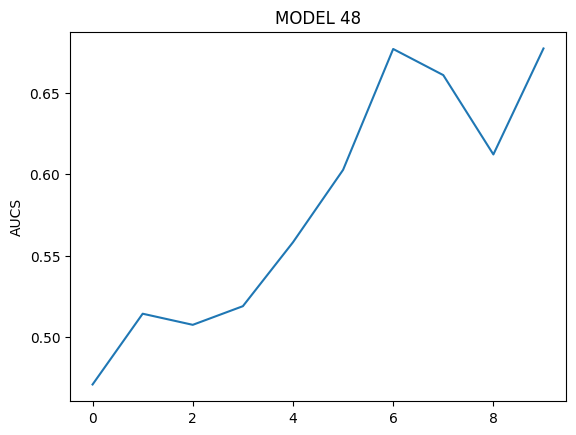

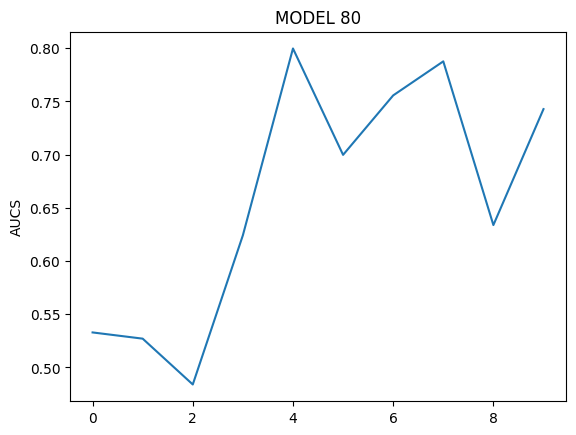

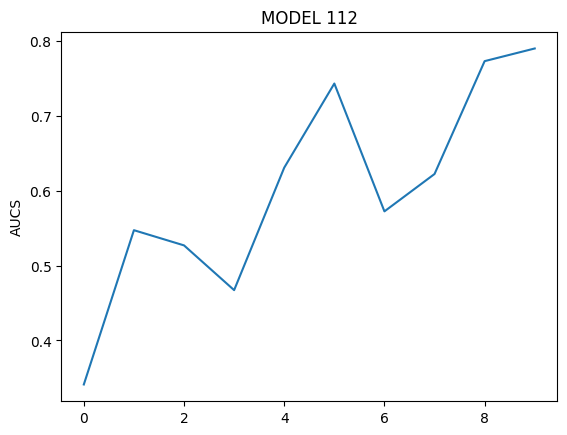

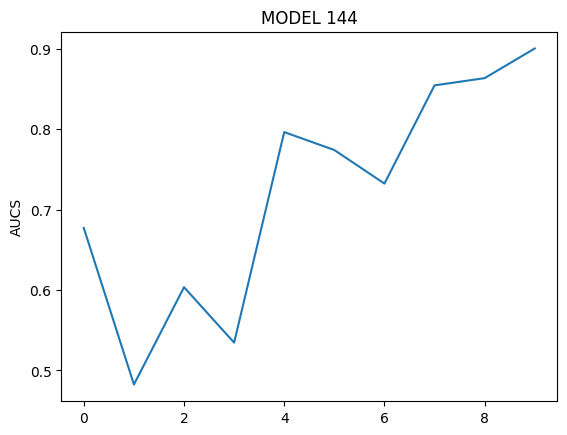

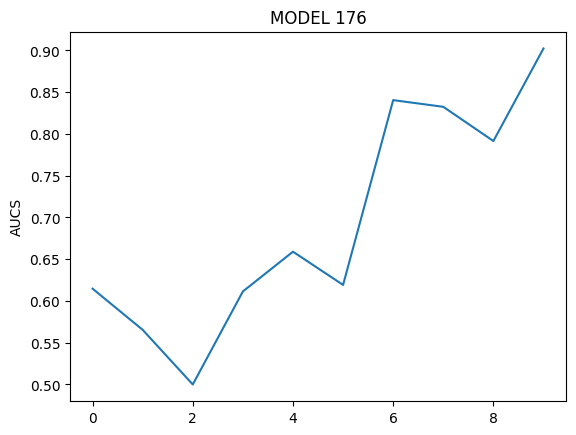

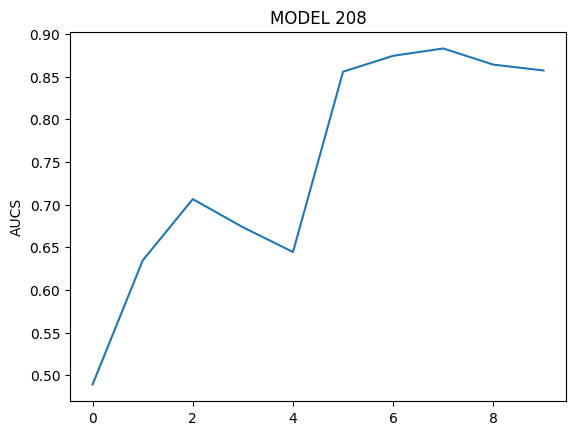

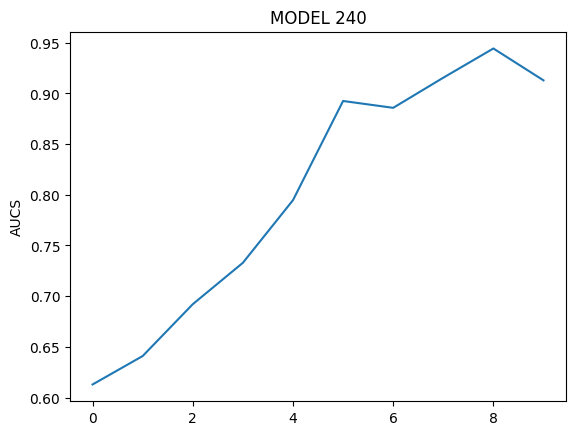

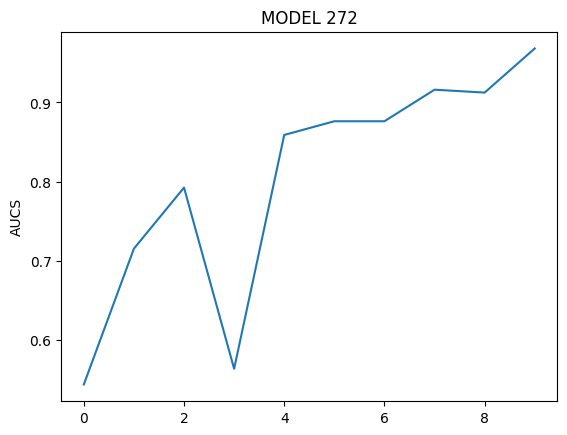

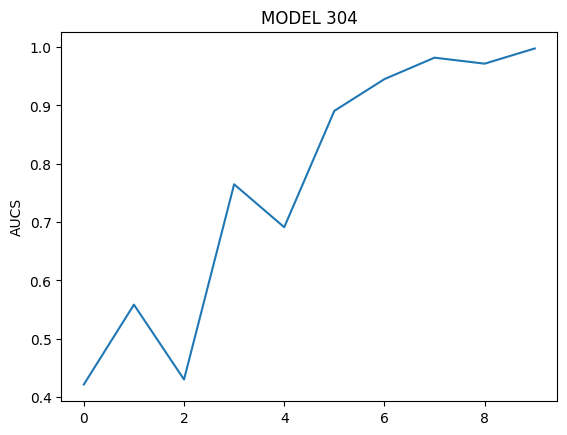

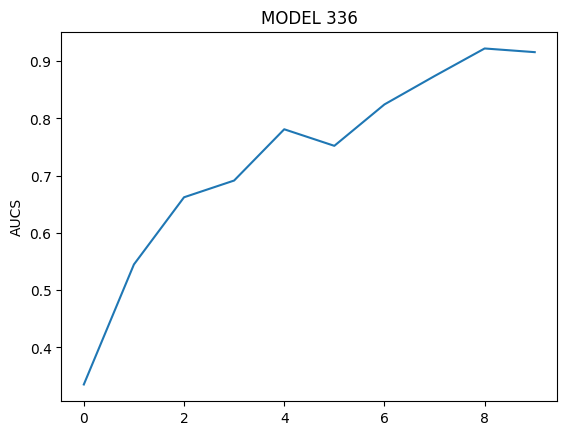

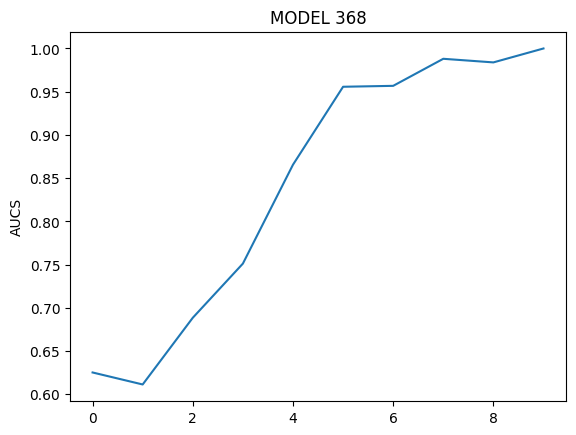

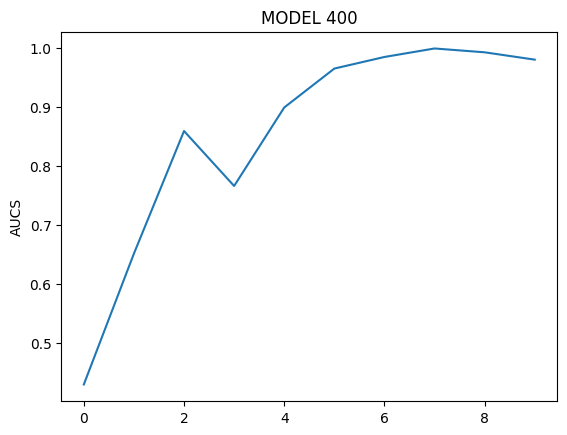

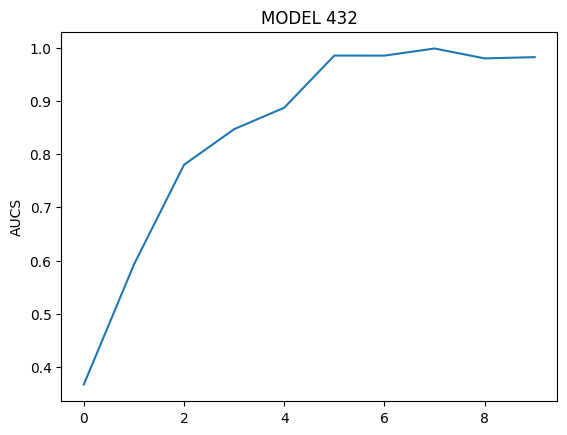

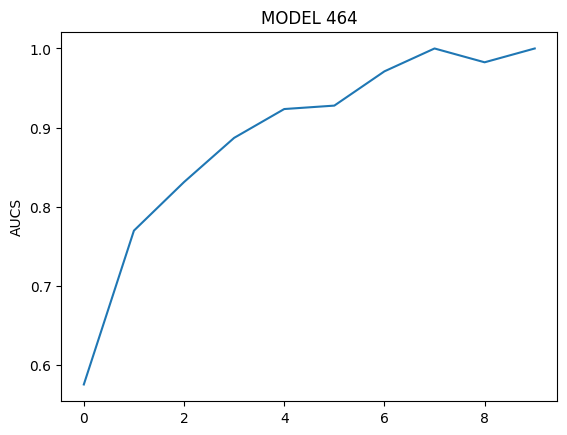

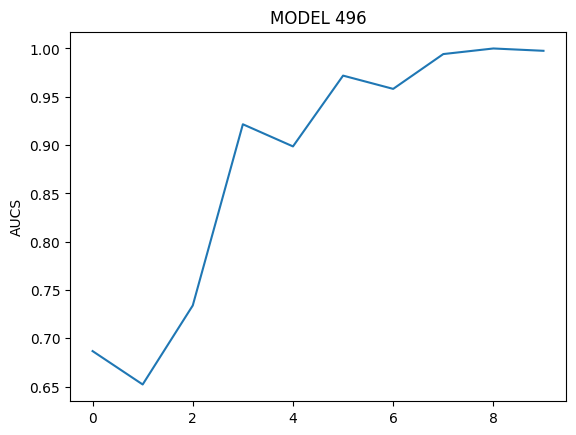

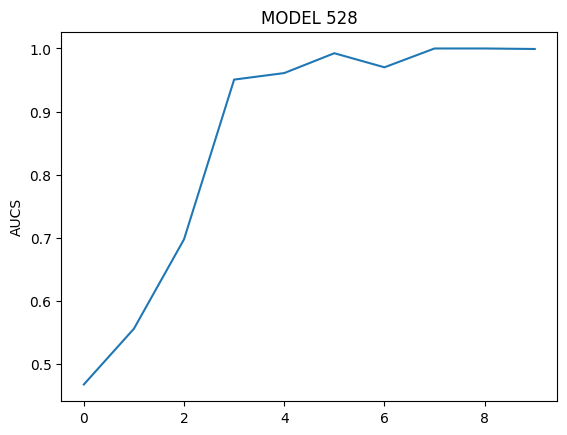

In [14]:
for mdl in models:CNN_lib.list_plot(mdl.roc_aucs,title=mdl.name,ylabel='AUCS')

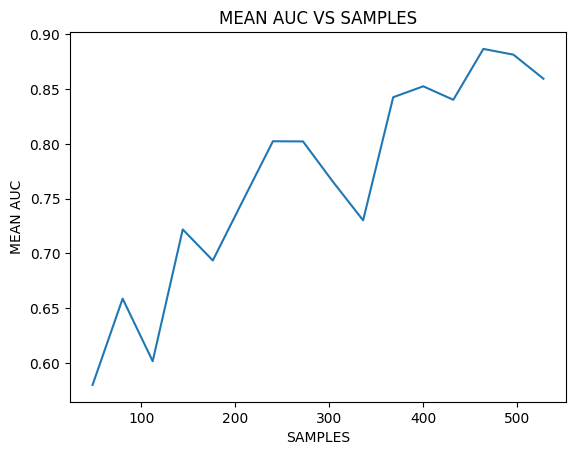

In [15]:
AUC_ls=[np.mean(mdl.roc_aucs) for mdl in models]
number_points=[mdl.samples for mdl in models]



CNN_lib.simple_plot(number_points,AUC_ls,title='MEAN AUC VS SAMPLES',xlabel='SAMPLES',ylabel='MEAN AUC')